# Trabajo Práctico Integrador N°4

**Selección de la temática a trabajar**<br>

Para este trabajo se eligió el dataset "Maternal Health Risk Data Set Data Set", el cual contiene información sobre el riesgo en el embarazo de diferentes mujeres y algunas métricas de salud relevantes vinculadas con este riesgo. El objetivo del trabajo es generar un modelo que nos permita predecir el riesgo de un embarazo usando las condiciones de salud descriptas en el dataset.

Elegimos esta temática por la importancia que tiene predecir el riesgo de un embarazo en una instancia temprana. La mayoría de las complicaciones médicas relacionadas con el embarazo parecen resolverse en el momento del parto o poco tiempo después. Los ejemplos comunes son: trabajo de parto prematuro, desprendimiento de placenta, preeclampsia y diabetes gestacional. Se sabe que las mujeres que desarrollaron tales complicaciones tienen un mayor riesgo de desarrollar complicaciones similares en futuros embarazos. Existe una clara asociación entre diversas complicaciones obstétricas y efectos a largo plazo sobre la salud materna. Las mujeres con antecedentes de resultados adversos del embarazo tienen un mayor riesgo de enfermedades cardiovasculares y metabólicas más adelante en la vida. Los datos vinculan cada vez más las complicaciones vasculares, metabólicas e inflamatorias maternas del embarazo con un mayor riesgo de enfermedad vascular en la edad adulta.

**Sobre este Dataset**<br>

Para la conformación de dataset se recopilaron datos de diferentes hospitales, clínicas comunitarias, centros de salud materna de las áreas rurales de Bangladesh a través del sistema de monitoreo de riesgos basado en IoT.

**Información de atributos:**<br>

**● Age:**   Edad en años de una mujer durante el embarazo.<br>
**● SystolicBP:** Valor superior de la Presión Arterial en mmHg, atributo significativo durante el embarazo.<br>
**● DiastolicBP:** Valor más bajo de la Presión Arterial en mmHg, atributo significativo durante el embarazo.<br>
**● BS:** Niveles de glucosa en sangre (se expresan en términos de una concentración molar, mmol/L).<br>
**● HeartRate:** Frecuencia cardíaca normal en reposo (latidos por minuto).<br>
**● Risk Level:** Nivel de riesgo predicho durante el embarazo considerando los atributos anteriores.<br>

In [1]:
# Importamos librerías a utilizar:

import pandas as pd
import numpy as np
import warnings

#API

import requests
import json

In [2]:
warnings.filterwarnings(action='ignore', category=UserWarning)

#### Importación de los datos

Para la importación de los datos, usaremos una API.

In [3]:
url = "https://api-maternal-health.herokuapp.com/" 
print(url)

response = requests.get(url)

data_response = response.json()
data_response

data_rough = pd.DataFrame(data_response["data"])
print(data_rough.shape)
data_rough

https://api-maternal-health.herokuapp.com/
(1014, 7)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98,86,high risk
1,35,140,90,13.0,98,70,high risk
2,29,90,70,8.0,100,80,high risk
3,30,140,85,7.0,98,70,high risk
4,35,120,60,6.1,98,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98,80,high risk
1010,55,120,90,18.0,98,60,high risk
1011,35,85,60,19.0,98,86,high risk
1012,43,120,90,18.0,98,70,high risk


### Descripción y limpieza del dataset original

In [4]:
data_rough.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   int64  
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(1), int64(5), object(1)
memory usage: 55.6+ KB


In [5]:
data_describe = pd.DataFrame(round(data_rough.isnull().sum() /data_rough.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe['type'] = data_rough.dtypes
data_describe = data_describe[['type','Porcentaje de nulos']]
data_describe['Nulos'] = data_rough.isnull().sum()
values= []
example=[]
for x in data_rough:
    values.append(len(data_rough[x].unique()))
    example.append(data_rough[x].unique())
data_describe['Valores distintos'] = values
data_describe['Ejemplos'] = example

data_describe

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
Age,int64,0.0,0,50,"[25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 5..."
SystolicBP,int64,0.0,0,19,"[130, 140, 90, 120, 85, 110, 70, 100, 75, 95, ..."
DiastolicBP,int64,0.0,0,16,"[80, 90, 70, 85, 60, 89, 75, 100, 50, 65, 95, ..."
BS,float64,0.0,0,29,"[15.0, 13.0, 8.0, 7.0, 6.1, 7.01, 11.0, 6.9, 1..."
BodyTemp,int64,0.0,0,6,"[98, 100, 102, 101, 103, 99]"
HeartRate,int64,0.0,0,16,"[86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 7..."
RiskLevel,object,0.0,0,3,"[high risk, low risk, mid risk]"


#### Distribucion de la variable target en el dataset original

In [6]:
# Librerias para gráficos: 

import matplotlib.pyplot as plt
import seaborn as sns

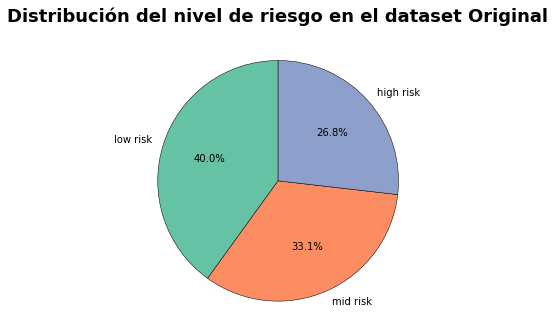

In [7]:
# Composición de la variable target 'Risk Level'

count=data_rough["RiskLevel"].value_counts().tolist()

label=data_rough["RiskLevel"].value_counts().index


plt.style.use('ggplot')



dic = dict(zip(label,count))

import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'Others' if (dic[k]<0) else k):
     newdic[key] = sum([dic[i] for i in list(group)])   

labels = newdic.keys()
sizes = newdic.values()
colores = sns.color_palette('Set2')
fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, colors=colores, autopct='%0.1f%%',wedgeprops={"edgecolor":"k"}, startangle=90)
ax.axis('equal')
plt.tight_layout()

# title
title = 'Distribución del nivel de riesgo en el dataset Original\n'
plt.title(title, loc='center', fontsize=18, fontweight = 'bold')

plt.show()

In [8]:
# Cantidad de registros según el tipo de riesgo:

dataframe_limpio_group_b_typ_class = data_rough.groupby("RiskLevel").size().reset_index(name="Total")

print(dataframe_limpio_group_b_typ_class)
type(dataframe_limpio_group_b_typ_class)

   RiskLevel  Total
0  high risk    272
1   low risk    406
2   mid risk    336


pandas.core.frame.DataFrame

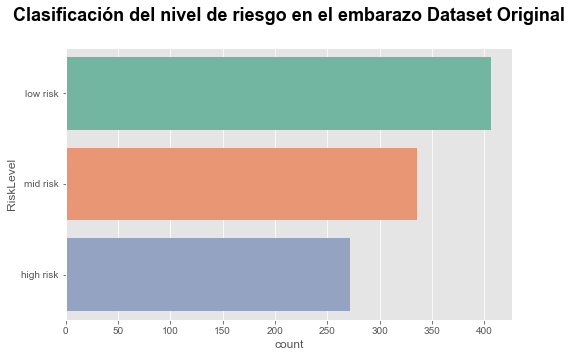

In [9]:
# Distribución de datos:

plt.figure(figsize=(8,5))

# title
title = 'Clasificación del nivel de riesgo en el embarazo Dataset Original\n'
plt.title(title, loc='center', fontsize=18, fontweight = 'bold')


plt.style.use('seaborn-darkgrid')
y= data_rough.RiskLevel

ax = sns.countplot(y=y, orient="h",order=data_rough['RiskLevel'].value_counts().index, palette='Set2')


plt.show()

Eliminamos registros que se encuetren por fuera de los rangos mínimos y máximos para cada uno de los atributos (según criterio médico)

##### Age

Establecemos la edad de entre 11 y 50 años como valores aceptados para edad de embarazo 

In [10]:
Age_mask = (data_rough['Age']<=50) & (data_rough['Age']>=11)
data_rough['Age']=data_rough.Age[Age_mask]

##### SystolicBP 

Para los valores de la presion arterial superior establecimos un rango de entre 90 y 240 mmHG

In [11]:
SystolicBP_mask = data_rough['SystolicBP']>= 90  & (data_rough['SystolicBP']<= 240)
data_rough['SystolicBP']=data_rough.SystolicBP[SystolicBP_mask]

##### DiastolicBP

Para los valores de la presion arterial inferior establecimos un rango de entre 120 y 60 mmHG

In [12]:
DiastolicBP_mask= (data_rough['DiastolicBP']<=120) & (data_rough['DiastolicBP']>=60)
data_rough['DiastolicBP']=data_rough.DiastolicBP[DiastolicBP_mask]

##### BS

Para los niveles de glucosa en sangre establecimos un rango de valores de entre 49.0 y 3.3 mmol/L

In [13]:
BS_mask = (data_rough['BS']<=49.0) & (data_rough['BS']>=3.3)
data_rough['BS']=data_rough.BS[BS_mask]

##### BodyTemp

Para el análisis de la temperatura, convertimos los valores expresados en la escala de Fahrenheit a Celsius. En esta nueva escala el rango de valores se encuentra entre 36 y 41°C

In [14]:
data_rough['BodyTemp']=round((((data_rough['BodyTemp']-32)*5)/9),2)

BodyTemp_mask = (data_rough['BodyTemp']<=41)&   (data_rough['BodyTemp']>=36)
data_rough['BodyTemp']=data_rough.BodyTemp[BodyTemp_mask]

##### HeartRate

El rango de valores de frecuencia cardiaca en reposo se estableció entre 60 y 100 latidos por minuto

In [15]:
HeartRate_mask = (data_rough['HeartRate']<=100) & (data_rough['HeartRate'] >=60)
data_rough['HeartRate']=data_rough.HeartRate[HeartRate_mask]

Una vez filtrados los valores que se ubican por fuera de los umbrales establecidos, lo que hacemos es eliminar los valores nulos nuevos

In [16]:
data_describe = pd.DataFrame(round(data_rough.isnull().sum() /data_rough.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe['type'] = data_rough.dtypes
data_describe = data_describe[['type','Porcentaje de nulos']]
data_describe['Nulos'] = data_rough.isnull().sum()
values= []
example=[]
for x in data_rough:
    values.append(len(data_rough[x].unique()))
    example.append(data_rough[x].unique())
data_describe['Valores distintos'] = values
data_describe['Ejemplos'] = example

data_describe

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
Age,float64,0.10,99,39,"[25.0, 35.0, 29.0, 30.0, 23.0, 32.0, 42.0, 19...."
SystolicBP,int64,0.00,0,19,"[130, 140, 90, 120, 85, 110, 70, 100, 75, 95, ..."
DiastolicBP,float64,0.05,49,15,"[80.0, 90.0, 70.0, 85.0, 60.0, 89.0, 75.0, 100..."
BS,float64,0.00,0,29,"[15.0, 13.0, 8.0, 7.0, 6.1, 7.01, 11.0, 6.9, 1..."
BodyTemp,float64,0.00,0,6,"[36.67, 37.78, 38.89, 38.33, 39.44, 37.22]"
HeartRate,float64,0.00,2,16,"[86.0, 70.0, 80.0, 76.0, 78.0, 77.0, 88.0, 90...."
RiskLevel,object,0.00,0,3,"[high risk, low risk, mid risk]"


In [17]:
data=data_rough.dropna()

In [18]:
data_describe = pd.DataFrame(round(data.isnull().sum() /data.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe['type'] = data.dtypes
data_describe = data_describe[['type','Porcentaje de nulos']]
data_describe['Nulos'] = data.isnull().sum()
values= []
example=[]
for x in data:
    values.append(len(data[x].unique()))
    example.append(data[x].unique())
data_describe['Valores distintos'] = values
data_describe['Ejemplos'] = example

data_describe

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
Age,float64,0.0,0,38,"[25.0, 35.0, 29.0, 30.0, 23.0, 32.0, 42.0, 19...."
SystolicBP,int64,0.0,0,15,"[130, 140, 90, 120, 85, 110, 100, 95, 80, 115,..."
DiastolicBP,float64,0.0,0,14,"[80.0, 90.0, 70.0, 85.0, 60.0, 89.0, 75.0, 100..."
BS,float64,0.0,0,27,"[15.0, 13.0, 8.0, 7.0, 6.1, 7.01, 11.0, 6.9, 1..."
BodyTemp,float64,0.0,0,6,"[36.67, 37.78, 38.89, 38.33, 39.44, 37.22]"
HeartRate,float64,0.0,0,15,"[86.0, 70.0, 80.0, 76.0, 78.0, 77.0, 88.0, 90...."
RiskLevel,object,0.0,0,3,"[high risk, low risk, mid risk]"


#### Descripción del dataset limpio "data"

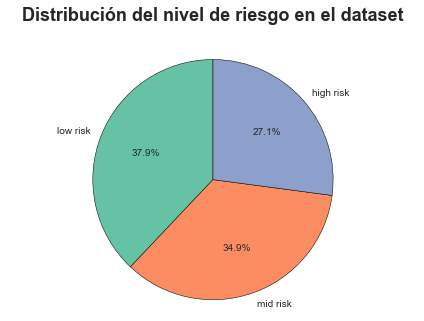

In [19]:
count=data["RiskLevel"].value_counts().tolist()

label=data["RiskLevel"].value_counts().index


plt.style.use('ggplot')



dic = dict(zip(label,count))

import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'Others' if (dic[k]<0) else k):
     newdic[key] = sum([dic[i] for i in list(group)])   

labels = newdic.keys()
sizes = newdic.values()
colores = sns.color_palette('Set2')
fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, colors=colores, autopct='%0.1f%%',wedgeprops={"edgecolor":"k"}, startangle=90)
ax.axis('equal')
plt.tight_layout()

# title
title = 'Distribución del nivel de riesgo en el dataset\n'
plt.title(title, loc='center', fontsize=18, fontweight = 'bold')

plt.show()

In [20]:
dataframe_limpio_group_b_typ_class = data.groupby("RiskLevel").size().reset_index(name="Total")

print(dataframe_limpio_group_b_typ_class)
type(dataframe_limpio_group_b_typ_class)

   RiskLevel  Total
0  high risk    235
1   low risk    329
2   mid risk    303


pandas.core.frame.DataFrame

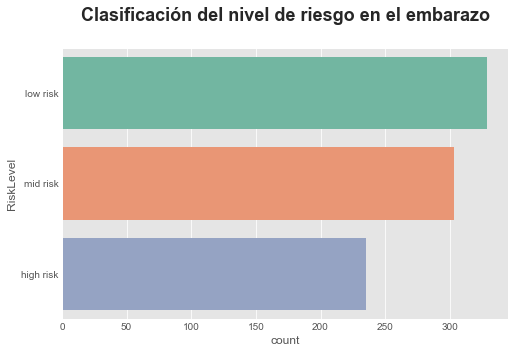

In [21]:
plt.figure(figsize=(8,5))

title = 'Clasificación del nivel de riesgo en el embarazo\n'
plt.title(title, loc='center', fontsize=18, fontweight = 'bold')

plt.style.use('seaborn-darkgrid')
y= data.RiskLevel

ax = sns.countplot(y=y, orient="h",order=data['RiskLevel'].value_counts().index, palette='Set2')

plt.show()

Como podemos observar en el grafico la clase "high risk" es minoritaria, por lo que el dataset esta **debalanceado**. Más adelante se evaluaran diferentes técnicas para tratar el desbalance de clases.

#### Analizamos la distribución de las variables

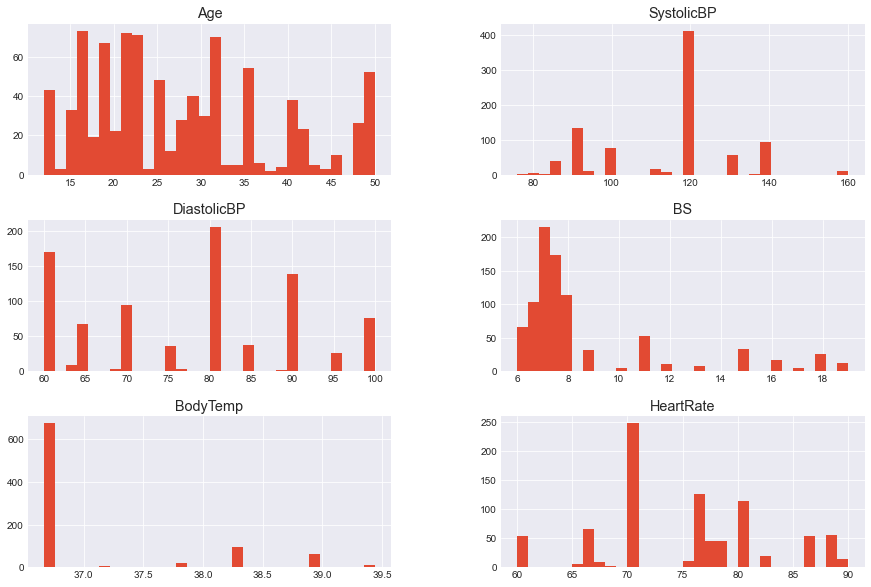

In [22]:
data.hist(figsize=(15,10),bins=30)
plt.show() 

<AxesSubplot:xlabel='RiskLevel', ylabel='Age'>

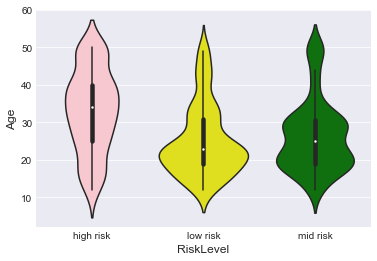

In [23]:
palette_maternity=["pink", "yellow", "green"]
sns.violinplot (x = "RiskLevel", y = "Age", data=data, palette = palette_maternity)

<AxesSubplot:xlabel='RiskLevel', ylabel='SystolicBP'>

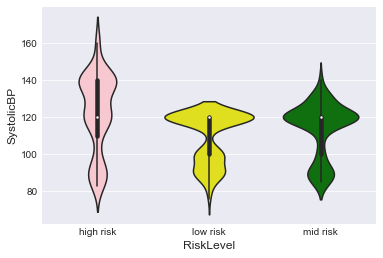

In [24]:
sns.violinplot (x = "RiskLevel", y = "SystolicBP", data=data, palette = palette_maternity)

<AxesSubplot:xlabel='RiskLevel', ylabel='DiastolicBP'>

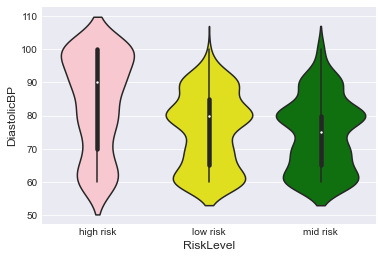

In [25]:
sns.violinplot (x = "RiskLevel", y = "DiastolicBP", data=data, palette = palette_maternity)

<AxesSubplot:xlabel='RiskLevel', ylabel='BodyTemp'>

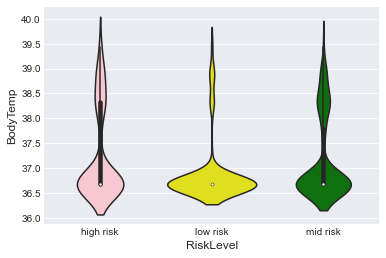

In [26]:
sns.violinplot (x = "RiskLevel", y = "BodyTemp", data=data, palette = palette_maternity)

<AxesSubplot:xlabel='RiskLevel', ylabel='HeartRate'>

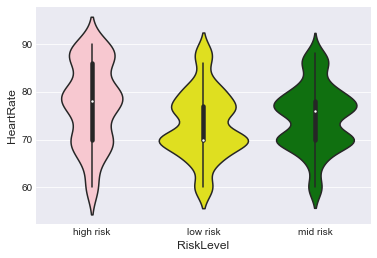

In [27]:
sns.violinplot (x = "RiskLevel", y = "HeartRate", data=data, palette = palette_maternity)


<AxesSubplot:xlabel='RiskLevel', ylabel='BS'>

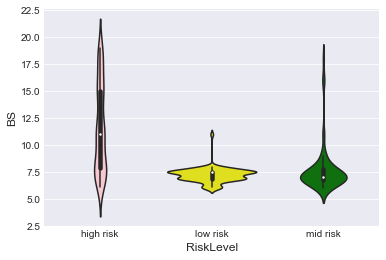

In [28]:
sns.violinplot (x = "RiskLevel", y = "BS", data=data, palette = palette_maternity)

<AxesSubplot:xlabel='RiskLevel', ylabel='BS'>

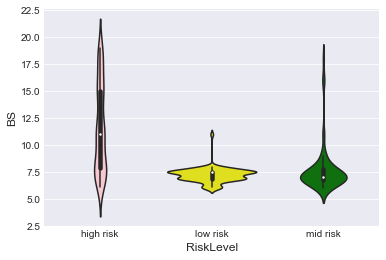

In [29]:
sns.violinplot (x = "RiskLevel", y = "BS", data=data, palette = palette_maternity)

<AxesSubplot:xlabel='RiskLevel', ylabel='HeartRate'>

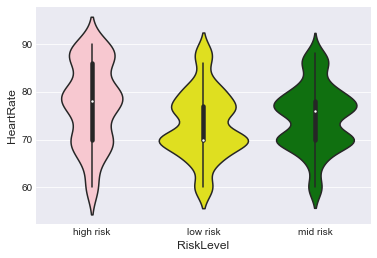

In [30]:
sns.violinplot (x = "RiskLevel", y = "HeartRate", data=data, palette = palette_maternity)

<AxesSubplot:xlabel='RiskLevel', ylabel='BodyTemp'>

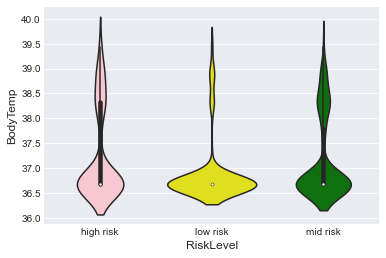

In [31]:
sns.violinplot (x = "RiskLevel", y = "BodyTemp", data=data, palette = palette_maternity)

In [32]:
y.value_counts(normalize=True)

low risk     0.379469
mid risk     0.349481
high risk    0.271050
Name: RiskLevel, dtype: float64

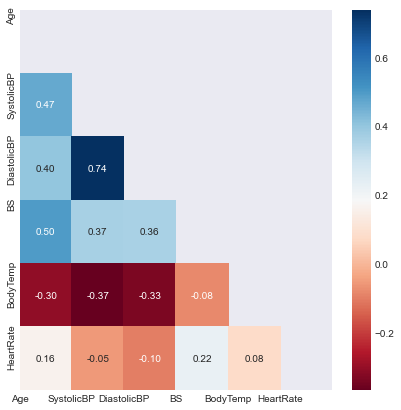

In [33]:
# Calculamos el coeficiente de correlacion entre variables:

correlacion=  data.corr(method='pearson')

# Sacamos la mitad que se repite:

mask=np.zeros_like(correlacion, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f, ax= plt.subplots(figsize=(7,7))

# Generamos el heatmap:

sns.heatmap(correlacion,annot=True, fmt='.2f', mask=mask,cmap='RdBu')
#x
plt.xticks(range(len(correlacion.columns)),correlacion.columns)
#y
plt.yticks(range(len(correlacion.columns)), correlacion.columns)
#plot
plt.show()

In [34]:
y.value_counts(normalize=True)

low risk     0.379469
mid risk     0.349481
high risk    0.271050
Name: RiskLevel, dtype: float64

### Variables target y features

Para evaluar los diferentes modelos que se generaran en esta Norebook, generaremos un conjunto de variables target y otro con las features.

In [35]:
# Para trabajar con los datos, reemplazaremos los tipos de riesgos por valores numericos del 0 al 2:

data["RiskLevel"].replace(['low risk','mid risk','high risk'], ['a-low risk','b-mid risk','c-high risk'],inplace=True)

C:\Users\123\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\series.py:4576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [36]:
data.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25.0,130,80.0,15.0,36.67,86.0,c-high risk
1,35.0,140,90.0,13.0,36.67,70.0,c-high risk
2,29.0,90,70.0,8.0,37.78,80.0,c-high risk
3,30.0,140,85.0,7.0,36.67,70.0,c-high risk
4,35.0,120,60.0,6.1,36.67,76.0,a-low risk


In [37]:
# Separamos a la variable target y al resto de las features:

X = data.drop(columns = 'RiskLevel')
y = data.RiskLevel

In [38]:
data_y_train = pd.DataFrame(y)
data_y_train.value_counts()

RiskLevel  
a-low risk     329
b-mid risk     303
c-high risk    235
dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [40]:
data_y_train = pd.DataFrame(y)
data_y_train.value_counts()

0    329
1    303
2    235
dtype: int64

In [41]:
 #Construimos los conjuntos de train y test, asignando el 70% de los registros a train y el 30% a test:
    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=129,stratify=data['RiskLevel'])

In [42]:
scaler=StandardScaler()  
X_train_sc=scaler.fit_transform(X_train)  
X_test_sc=scaler.transform(X_test)

In [43]:
print(X_train.shape) 
print(X_test.shape)

(606, 6)
(261, 6)


In [44]:
data_y_train = pd.DataFrame(y_train)
data_y_train.value_counts()

0    230
1    212
2    164
dtype: int64

In [45]:
#Listado de métricas de los modelos
accuracy_modelos=[]
precision_modelos=[]
recall_modelos=[]
f1_score_modelos=[]

## Tratamiento del desbalance de clases

Antes de comenzar a probar los diferentes modelos nos aseguramos de elegir los conjuntos de train y test óptimos. Para ello  aplicamos los diferentes métodos para tratar el desbalance de clases y elegimos los conjuntos que mejor "recall" nos den en la clase "high risk", ya que por la naturaleza de nuestro problema debemos obtener la menor cantidad posible de falsos negativos en esta clase.

### Regresion Logística con diferentes métodos de balanceo de clases

Vamos a aplicar en todos los casos un modelo de Regresión Logística sobre los distintos conjuntos y mediremos su performance.

In [46]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV,SGDClassifier

In [47]:
# Definimos una función que crea el modelo que usaremos cada vez:

def run_model(X_train, y_train):
    clf_base = LogisticRegression(penalty='none',random_state=123,max_iter=500)
    clf_base.fit(X_train, y_train)
    return clf_base

In [48]:
# Definimos una función para mostrar los resultados:

def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y); 

    # Matriz de confusión
    fig, ax = plt.subplots(figsize=(6, 4))

    # color map
    cmap = "YlGnBu"
    sns.heatmap(conf_matrix, annot=True, fmt='.0f',linewidths=5, cmap=cmap, 
           cbar_kws={"shrink": .8}, square=True) 

    plt.ylabel('Etiquetas reales\n')
    plt.xlabel('\nEtiquetas predichas')

    plt.yticks(plt.yticks()[0], rotation=0)
    plt.xticks(plt.xticks()[0])

    # title
    title = 'Matriz de confusión - Regresión Lineal\n'
    plt.title(title, loc='center', fontsize=18, fontweight = 'bold')
    plt.show()

    print("METRICAS")
    print (classification_report(y_test, pred_y,digits=3, target_names = ['low risk', 'mid risk', 'high risk']))

In [49]:
recall_hr_rl=[]

#### Modelo de Regresión Logística sobre el dataset original

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

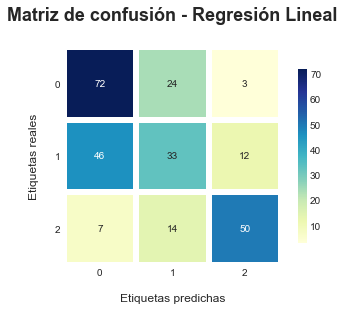

METRICAS
              precision    recall  f1-score   support

    low risk      0.576     0.727     0.643        99
    mid risk      0.465     0.363     0.407        91
   high risk      0.769     0.704     0.735        71

    accuracy                          0.594       261
   macro avg      0.603     0.598     0.595       261
weighted avg      0.590     0.594     0.586       261



In [51]:
model_original = run_model(X_train_sc, y_train)
y_pred = model_original.predict(X_test_sc)
res = mostrar_resultados(y_test, y_pred)

In [52]:
import re

cr_sm = np.array([float(s) for s in re.findall(r'-?\d+\.?\d*', (classification_report(y_test, y_pred,digits=3, target_names = ['low risk', 'mid risk', 'high risk'])))])
recall_sm = cr_sm[10]
recall_hr_rl.append(recall_sm)

In [53]:
recall_sm

0.704

#### Modelo de Regresión logística aplicando Undersampling

In [54]:
from imblearn.under_sampling import RandomUnderSampler
undersampler=RandomUnderSampler(sampling_strategy="not minority",random_state=127);

X_train_us,y_train_us=undersampler.fit_resample(X_train,y_train);

scaler=StandardScaler()  
X_train_us_sc=scaler.fit_transform(X_train_us)  
X_test_us_sc=scaler.transform(X_test)

In [55]:
print('NUEVA Composición del training set:\n', len(y_train_us))

NUEVA Composición del training set:
 492


In [56]:
print('ANTERIOR Composición del training set:\n', len(y_train))

ANTERIOR Composición del training set:
 606


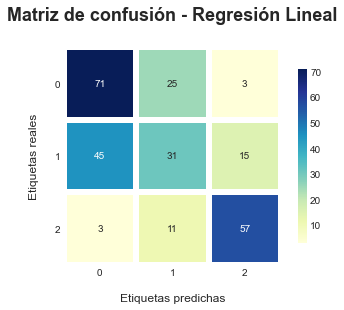

METRICAS
              precision    recall  f1-score   support

    low risk      0.597     0.717     0.651        99
    mid risk      0.463     0.341     0.392        91
   high risk      0.760     0.803     0.781        71

    accuracy                          0.609       261
   macro avg      0.606     0.620     0.608       261
weighted avg      0.594     0.609     0.596       261



In [57]:
model_us = run_model(X_train_us_sc, y_train_us)
y_pred = model_us.predict(X_test_us_sc)
mostrar_resultados(y_test, y_pred)

In [58]:
cr_rl_us = np.array([float(s) for s in re.findall(r'-?\d+\.?\d*', (classification_report(y_test, y_pred,target_names = ['low risk', 'mid risk', 'high risk'], digits=3)))])
recall_rl_us = cr_rl_us[10]
recall_hr_rl.append(recall_rl_us)

In [59]:
recall_rl_us

0.803

#### Modelo de Regresión Logística aplicando Oversampling

In [60]:
from imblearn.over_sampling import RandomOverSampler
oversampler=RandomOverSampler(sampling_strategy='not minority',random_state=127); # iguala las clases

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

scaler=StandardScaler()  
X_train_os_sc=scaler.fit_transform(X_train_os)   
X_test_os_sc=scaler.transform(X_test)

In [61]:
print('NUEVA Composición del training set:\n', len(y_train_os))

NUEVA Composición del training set:
 624


In [62]:
print('ANTERIOR Composición del training set:\n', len(y_train))

ANTERIOR Composición del training set:
 606


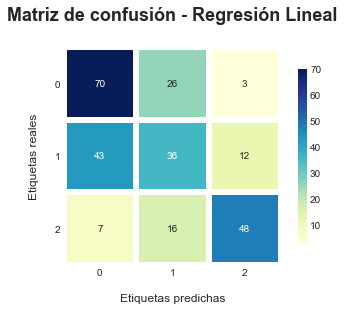

METRICAS
              precision    recall  f1-score   support

    low risk      0.583     0.707     0.639        99
    mid risk      0.462     0.396     0.426        91
   high risk      0.762     0.676     0.716        71

    accuracy                          0.590       261
   macro avg      0.602     0.593     0.594       261
weighted avg      0.589     0.590     0.586       261



In [63]:
model_os = run_model(X_train_os_sc, y_train_os)
y_pred = model_os.predict(X_test_os_sc)
mostrar_resultados(y_test, y_pred)

In [64]:
cr_rl_os = np.array([float(s) for s in re.findall(r'-?\d+\.?\d*', (classification_report(y_test, y_pred,target_names = ['low risk', 'mid risk', 'high risk'],digits=3)))])
recall_rl_os = cr_rl_os[10]
recall_hr_rl.append(recall_rl_os)

In [65]:
recall_rl_os

0.676

#### Modelo de Regresión Logística aplicando SMOTENC

In [66]:
from imblearn.over_sampling import SMOTENC

sm=SMOTENC(categorical_features=[5],k_neighbors=3,random_state=127)
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)

scaler=StandardScaler()  
X_train_sm_sc=scaler.fit_transform(X_train_sm)      
X_test_sm_sc=scaler.transform(X_test)

In [67]:
print('NUEVA Composición del training set:\n', len(y_train_sm))

NUEVA Composición del training set:
 690


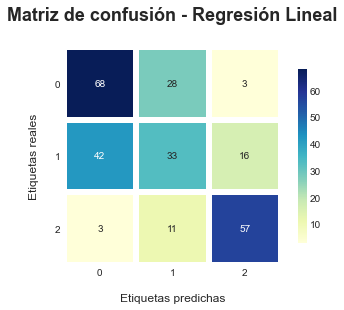

METRICAS
              precision    recall  f1-score   support

    low risk      0.602     0.687     0.642        99
    mid risk      0.458     0.363     0.405        91
   high risk      0.750     0.803     0.776        71

    accuracy                          0.605       261
   macro avg      0.603     0.617     0.607       261
weighted avg      0.592     0.605     0.595       261



In [68]:
model_sm = run_model(X_train_sm_sc, y_train_sm)
y_pred_rl = model_sm.predict(X_test_sm_sc)
mostrar_resultados(y_test, y_pred_rl)

In [69]:
cr_rl_SMOTENC = np.array([float(s) for s in re.findall(r'-?\d+\.?\d*', (classification_report(y_test, y_pred_rl,target_names = ['low risk', 'mid risk', 'high risk'],digits=3)))])
recall_rl_SMOTENC = cr_rl_SMOTENC[10]
recall_hr_rl.append(recall_rl_SMOTENC)

#### Modelo de Regresión Logística aplicando Class weighting

Como Regresion logistica admite el hiperárametro class_weight, vamos a probar si podemos obtener un valor de recall superior para la clase high risk

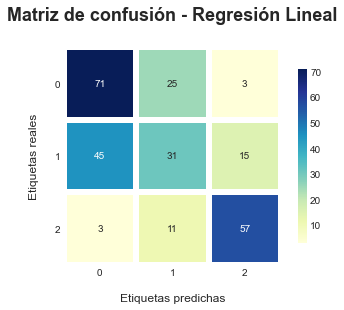

METRICAS
              precision    recall  f1-score   support

    low risk      0.597     0.717     0.651        99
    mid risk      0.463     0.341     0.392        91
   high risk      0.760     0.803     0.781        71

    accuracy                          0.609       261
   macro avg      0.606     0.620     0.608       261
weighted avg      0.594     0.609     0.596       261



In [70]:
model = LogisticRegression(class_weight = 'balanced',penalty='none',random_state=127,max_iter=500)

scaler=StandardScaler()

X_train_cw=scaler.fit_transform(X_train);
X_test_cw_sc=scaler.transform(X_test);

model.fit(X_train_cw,y_train)
y_pred = model.predict(X_test_cw_sc)
mostrar_resultados(y_test, y_pred)

Class weigting nos ofrece valores similares a los de Undersampling y SMOTEC.

### Resultados de las tecnicas de balanceo usando Regresión Logística

Generamos un listado de resultados sobre  las técnicas de balanceo utilizadas y los valores de Recall para la clase "high risk". 
Observamos que las técnica que mejor Recall arrojan son Undersampling y SMOTENC

In [71]:
# Listado de los modelos:

listado_tecnicas=['Sin modificar','Undersampling','Oversampling','SMOTENC']

In [72]:
df_accuracy=pd.DataFrame(list(zip(listado_tecnicas,recall_hr_rl)), columns=['Técnica','Recall high risk']).sort_values(by=['Recall high risk'],ascending = False)
df_accuracy

,Técnica,Recall high risk
1,Undersampling,0.803
3,SMOTENC,0.803
0,Sin modificar,0.704
2,Oversampling,0.676


Para poder comparar los resultados obtenidos evaluamos las mismas técnicas de balanceo sobre los modelos KNN y Naive bayes

### KNN con diferentes métodos de balanceo de clases

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [74]:
# definimos una función que crea el modelo que usaremos cada vez
def run_model_KNN(X_train, y_train):
    k_range = list(range(1, 31))
    weights_range = ["uniform","distance"]
    metric_range = ["euclidean","manhattan","chebyshev","minkowski","wminkowski","seuclidean","mahalanobis"]
    param_grid = dict(n_neighbors=k_range, weights = weights_range, metric = metric_range)
    folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=folds, scoring='accuracy', n_jobs=4)
    grid.fit(X_train, y_train)
    
    accuracy_knn = grid.best_score_
    
    return grid

In [75]:
# Definimos una función para mostrar los resultados:

def mostrar_resultados_KNN(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y);   
    
    #Matriz de confusión
    fig, ax = plt.subplots(figsize=(6, 4))

    # color map
    cmap = "YlGnBu"
    sns.heatmap(conf_matrix, annot=True, fmt='.0f',linewidths=5, cmap=cmap, 
           cbar_kws={"shrink": .8}, square=True) 

    plt.ylabel('Etiquetas reales\n')
    plt.xlabel('\nEtiquetas predichas')

    plt.yticks(plt.yticks()[0], rotation=0)
    plt.xticks(plt.xticks()[0])

    # title
    title = 'Matriz de confusión - KNN\n'
    plt.title(title, loc='center', fontsize=18, fontweight = 'bold')
    plt.show()
    
    print("METRICAS")
    print (classification_report(y_test, pred_y,digits=3, target_names = ['low risk', 'mid risk', 'high risk']))

In [76]:
recall_hr_knn=[]

#### Modelo KNN aplicando el dataset original

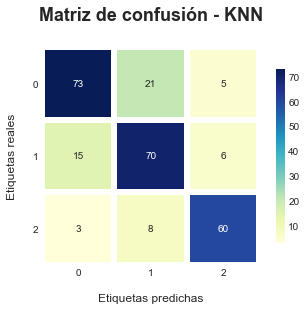

METRICAS
              precision    recall  f1-score   support

    low risk      0.802     0.737     0.768        99
    mid risk      0.707     0.769     0.737        91
   high risk      0.845     0.845     0.845        71

    accuracy                          0.778       261
   macro avg      0.785     0.784     0.783       261
weighted avg      0.781     0.778     0.778       261



In [77]:
model_original = run_model_KNN(X_train_sc, y_train)
y_pred = model_original.predict(X_test_sc)
res = mostrar_resultados_KNN(y_test, y_pred)

In [78]:
cr_sm_knn = np.array([float(s) for s in re.findall(r'-?\d+\.?\d*', (classification_report(y_test, y_pred,target_names = ['low risk', 'mid risk', 'high risk'],digits=3)))])
recall_sm_knn = cr_sm_knn[10]
recall_hr_knn.append(recall_sm_knn)

#### Modelo KNN aplicando Undersampling

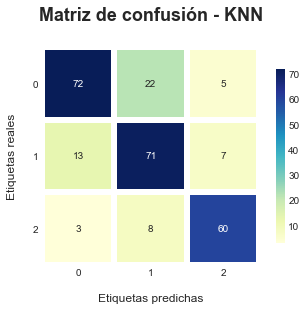

METRICAS
              precision    recall  f1-score   support

    low risk      0.818     0.727     0.770        99
    mid risk      0.703     0.780     0.740        91
   high risk      0.833     0.845     0.839        71

    accuracy                          0.778       261
   macro avg      0.785     0.784     0.783       261
weighted avg      0.782     0.778     0.778       261



In [79]:
model_sm = run_model_KNN(X_train_us_sc, y_train_us)
y_pred = model_sm.predict(X_test_us_sc)
mostrar_resultados_KNN(y_test, y_pred)

In [80]:
cr_knn_us = np.array([float(s) for s in re.findall(r'-?\d+\.?\d*', (classification_report(y_test, y_pred,target_names = ['low risk', 'mid risk', 'high risk'],digits=3)))])
recall_knn_us = cr_knn_us[10]
recall_hr_knn.append(recall_knn_us)

#### Modelo KNN aplicando Oversampling

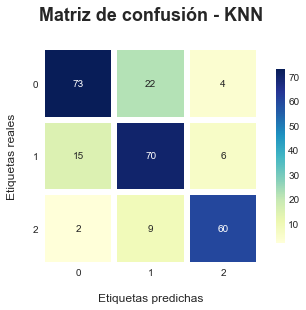

METRICAS
              precision    recall  f1-score   support

    low risk      0.811     0.737     0.772        99
    mid risk      0.693     0.769     0.729        91
   high risk      0.857     0.845     0.851        71

    accuracy                          0.778       261
   macro avg      0.787     0.784     0.784       261
weighted avg      0.782     0.778     0.779       261



In [81]:
model_os = run_model_KNN(X_train_os_sc, y_train_os)
y_pred = model_os.predict(X_test_os_sc)
mostrar_resultados_KNN(y_test, y_pred)

In [82]:
cr_knn_os = np.array([float(s) for s in re.findall(r'-?\d+\.?\d*', (classification_report(y_test, y_pred,target_names = ['low risk', 'mid risk', 'high risk'],digits=3)))])
recall_knn_os = cr_knn_os[10]
recall_hr_knn.append(recall_knn_os)

#### Modelo KNN aplicando SMOTENC

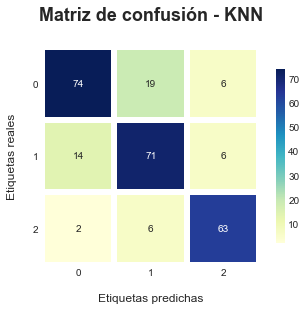

METRICAS
              precision    recall  f1-score   support

    low risk      0.822     0.747     0.783        99
    mid risk      0.740     0.780     0.759        91
   high risk      0.840     0.887     0.863        71

    accuracy                          0.797       261
   macro avg      0.801     0.805     0.802       261
weighted avg      0.798     0.797     0.797       261



In [83]:
model_sm = run_model_KNN(X_train_sm_sc, y_train_sm)
y_pred_knn = model_sm.predict(X_test_sm_sc)
mostrar_resultados_KNN(y_test, y_pred_knn)

In [84]:
cr_knn_SMOTENC = np.array([float(s) for s in re.findall(r'-?\d+\.?\d*', (classification_report(y_test, y_pred_knn,target_names = ['low risk', 'mid risk', 'high risk'],digits=3)))])
recall_knn_SMOTENC = cr_knn_SMOTENC[10]
recall_hr_knn.append(recall_knn_SMOTENC)

In [85]:
df_accuracy=pd.DataFrame(list(zip(listado_tecnicas,recall_hr_knn)), columns=['Técnica','Recall high risk']).sort_values(by=['Recall high risk'],ascending = False)
df_accuracy

,Técnica,Recall high risk
3,SMOTENC,0.887
0,Sin modificar,0.845
1,Undersampling,0.845
2,Oversampling,0.845


### Naive Bayes con diferentes técnicas de balanceo de clases


In [86]:
# Importamos librerías:

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

In [87]:
# Definimos una función que crea el modelo que usaremos cada vez:

def run_model_NAIVE_BAYES(X_train, y_train):
    gnb = GaussianNB()

    gnb.fit(X_train, y_train)
        
    return gnb

In [88]:
# Definimos una función para mostrar los resultados:

def mostrar_resultados_NAIVE_BAYES(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y); 

    #Matriz de confusión
    fig, ax = plt.subplots(figsize=(6, 4))

    # color map
    cmap = "YlGnBu"
    sns.heatmap(conf_matrix, annot=True, fmt='.0f',linewidths=5, cmap=cmap, 
           cbar_kws={"shrink": .8}, square=True) 

    plt.ylabel('Etiquetas reales\n')
    plt.xlabel('\nEtiquetas predichas')

    plt.yticks(plt.yticks()[0], rotation=0)
    plt.xticks(plt.xticks()[0])

    # title
    title = 'Matriz de confusión - Naive Bayes\n'
    plt.title(title, loc='center', fontsize=18, fontweight = 'bold')
    plt.show()

    print("METRICAS")
    print (classification_report(y_test, pred_y,digits=3, target_names = ['low risk', 'mid risk', 'high risk']))

In [89]:
recall_hr_nb=[]

#### Modelo NB aplicando dataset original

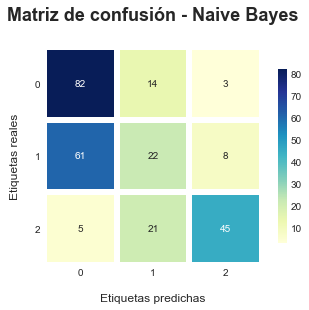

METRICAS
              precision    recall  f1-score   support

    low risk      0.554     0.828     0.664        99
    mid risk      0.386     0.242     0.297        91
   high risk      0.804     0.634     0.709        71

    accuracy                          0.571       261
   macro avg      0.581     0.568     0.557       261
weighted avg      0.563     0.571     0.548       261



In [90]:
model_original = run_model_NAIVE_BAYES(X_train_sc, y_train)
y_pred = model_original.predict(X_test_sc)
mostrar_resultados_NAIVE_BAYES(y_test, y_pred)

In [91]:
cr_sm_nb = np.array([float(s) for s in re.findall(r'-?\d+\.?\d*', (classification_report(y_test, y_pred,target_names = ['low risk', 'mid risk', 'high risk'],digits=3)))])
recall_sm_nb = cr_sm_nb[10]
recall_hr_nb.append(recall_sm_nb)

#### Modelo NB aplicando Undersampling

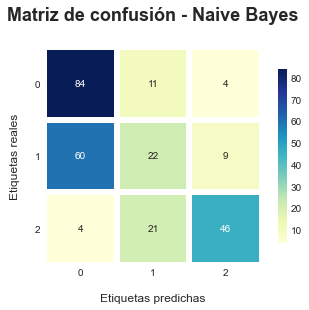

METRICAS
              precision    recall  f1-score   support

    low risk      0.568     0.848     0.680        99
    mid risk      0.407     0.242     0.303        91
   high risk      0.780     0.648     0.708        71

    accuracy                          0.582       261
   macro avg      0.585     0.579     0.564       261
weighted avg      0.569     0.582     0.556       261



In [92]:
model_os = run_model_NAIVE_BAYES(X_train_us_sc, y_train_us)
y_pred = model_os.predict(X_test_us_sc)
mostrar_resultados_NAIVE_BAYES(y_test, y_pred)

In [93]:
cr_nb_us = np.array([float(s) for s in re.findall(r'-?\d+\.?\d*', (classification_report(y_test, y_pred,target_names = ['low risk', 'mid risk', 'high risk'],digits=3)))])
recall_nb_us = cr_nb_us[10]
recall_hr_nb.append(recall_nb_us)

#### Modelo NB aplicando Oversampling

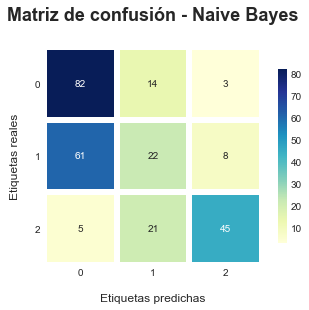

METRICAS
              precision    recall  f1-score   support

    low risk      0.554     0.828     0.664        99
    mid risk      0.386     0.242     0.297        91
   high risk      0.804     0.634     0.709        71

    accuracy                          0.571       261
   macro avg      0.581     0.568     0.557       261
weighted avg      0.563     0.571     0.548       261



In [94]:
model_os = run_model_NAIVE_BAYES(X_train_os_sc, y_train_os)
y_pred = model_os.predict(X_test_os_sc)
mostrar_resultados_NAIVE_BAYES(y_test, y_pred)

In [95]:
cr_nb_os = np.array([float(s) for s in re.findall(r'-?\d+\.?\d*', (classification_report(y_test, y_pred,target_names = ['low risk', 'mid risk', 'high risk'],digits=3)))])
recall_nb_os = cr_nb_os[10]
recall_hr_nb.append(recall_nb_os)

##### Modelo NB aplicando SMOTENC

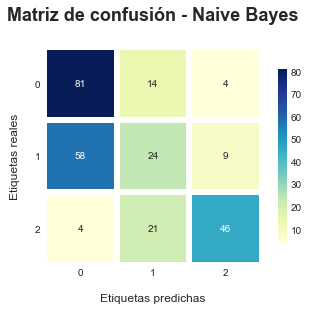

METRICAS
              precision    recall  f1-score   support

    low risk      0.566     0.818     0.669        99
    mid risk      0.407     0.264     0.320        91
   high risk      0.780     0.648     0.708        71

    accuracy                          0.579       261
   macro avg      0.584     0.577     0.566       261
weighted avg      0.569     0.579     0.558       261



In [96]:
model_sm = run_model_NAIVE_BAYES(X_train_sm_sc, y_train_sm)
y_pred_nb = model_sm.predict(X_test_sm_sc)
mostrar_resultados_NAIVE_BAYES(y_test, y_pred_nb)

In [97]:
cr_nb_SMOTENC = np.array([float(s) for s in re.findall(r'-?\d+\.?\d*', (classification_report(y_test, y_pred_nb,target_names = ['low risk', 'mid risk', 'high risk'],digits=3)))])
recall_nb_SMOTENC = cr_nb_SMOTENC[10]
recall_hr_nb.append(recall_nb_SMOTENC)

In [98]:
df_accuracy=pd.DataFrame(list(zip(listado_tecnicas,recall_hr_nb)), columns=['Técnica','Recall high risk']).sort_values(by=['Recall high risk'],ascending = False)
df_accuracy

,Técnica,Recall high risk
1,Undersampling,0.648
3,SMOTENC,0.648
0,Sin modificar,0.634
2,Oversampling,0.634


### Selección del conjunto de entrenamiento

Del proceso de balanceo del dataset, vemos que las técnicas que mejores valores de "recall" arrojan para la categoria "high risk" son undesampling y SMOTENC. Al validar estas técnicas con los tres modelos de clasificacion, vemos que SMOTENC resulta estar en el primer lugar, por lo que eligiremos esta técnica para balancear los datos.

In [99]:
X_train = pd.DataFrame(X_train_sm_sc, columns=['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate'])
X_test = pd.DataFrame(X_test_sm_sc, columns=['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate'])
y_train = y_train_sm

In [100]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [101]:
# Regresion logistica:

accuracy_rl = round(accuracy_score(y_test, y_pred_rl),3)
precision_rl = round(precision_score(y_test, y_pred_rl, average='macro'),3)
recall_rl = round(recall_score(y_test, y_pred_rl, average='macro'),3)
f1_score_rl =round(f1_score(y_test, y_pred_rl, average='macro'),3)

# KNN:

accuracy_knn = round(accuracy_score(y_test, y_pred_knn),3)
precision_knn = round(precision_score(y_test, y_pred_knn, average='macro'),3)
recall_knn = round(recall_score(y_test, y_pred_knn, average='macro'),3)
f1_score_knn =round(f1_score(y_test, y_pred_knn, average='macro'),3)

# Naive Bayes:

accuracy_nb = round(accuracy_score(y_test, y_pred_nb),3)
precision_nb = round(precision_score(y_test, y_pred_nb, average='macro'),3)
recall_nb = round(recall_score(y_test, y_pred_nb, average='macro'),3)
f1_score_nb =round(f1_score(y_test, y_pred_nb, average='macro'),3)

In [102]:
# Regresión logistica:

accuracy_modelos.append(accuracy_rl)
precision_modelos.append(precision_rl)
recall_modelos.append(recall_rl)
f1_score_modelos.append(f1_score_rl)

# KNN:

accuracy_modelos.append(accuracy_knn)
precision_modelos.append(precision_knn)
recall_modelos.append(recall_knn)
f1_score_modelos.append(f1_score_knn)

# Naive Bayes:
    
accuracy_modelos.append(accuracy_nb)
precision_modelos.append(precision_nb)
recall_modelos.append(recall_nb)
f1_score_modelos.append(f1_score_nb)

## Evaluación de modelos de clasificación

A continuación usaremos diferentes modelos de clasificación para predecir el nivel de riesgo de las pacientes embarazadas. Una vez probados los modelos, evaluaremos la performance que tuvieron y elegiremos el mejor para nuestro caso.
Primero usaremos un árbol de clasificación y despues probaremos distintos modelos de ensamble.

### Árbol de clasificación

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
decision = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

In [105]:
y_pred  =  decision.predict(X_test)

In [106]:
importancia_features = pd.DataFrame(decision.feature_importances_, index = X.columns, columns=['importancia'])
importancia_features_sort = importancia_features.sort_values('importancia', ascending=True)
importancia_features_sort

,importancia
HeartRate,0.076168
DiastolicBP,0.079182
BodyTemp,0.086489
Age,0.152351
SystolicBP,0.209188
BS,0.396622


<AxesSubplot:>

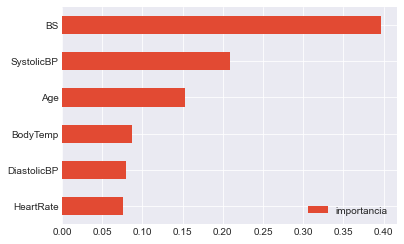

In [107]:
importancia_features_sort.plot(kind='barh')

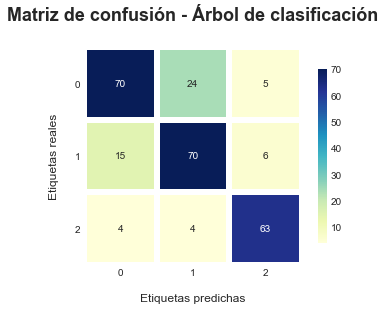

''

In [108]:
# Matriz de confusión:

fig, ax = plt.subplots(figsize=(6, 4))

# color map
cmap = "YlGnBu"
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.0f',linewidths=5, cmap=cmap, 
           cbar_kws={"shrink": .8}, square=True) 

plt.ylabel('Etiquetas reales\n')
plt.xlabel('\nEtiquetas predichas')

plt.yticks(plt.yticks()[0], rotation=0)
plt.xticks(plt.xticks()[0])

# title
title = 'Matriz de confusión - Árbol de clasificación\n'
plt.title(title, loc='center', fontsize=18, fontweight = 'bold')
plt.show()
;

In [109]:
print(classification_report(y_test,y_pred,target_names = ['low risk', 'mid risk', 'high risk'],digits=3))

              precision    recall  f1-score   support

    low risk      0.787     0.707     0.745        99
    mid risk      0.714     0.769     0.741        91
   high risk      0.851     0.887     0.869        71

    accuracy                          0.778       261
   macro avg      0.784     0.788     0.785       261
weighted avg      0.779     0.778     0.777       261



In [110]:
y_pred_train  =  decision.predict(X_train)
y_prob_tree = decision.predict_proba(X_test)

In [111]:
#Accuracy
accuracy_ac = round(accuracy_score(y_test, y_pred),3)
print("Accuracy:",accuracy_ac)
err_clasif_ac = round((1 - accuracy_score(y_test, y_pred)),3)
#error de clasificación
print("Error de clasificación:", err_clasif_ac)
#Precision
precision_ac = round(precision_score(y_test, y_pred, average='macro'),3)
print("Precision:",precision_ac)
#Recall
recall_ac = round(recall_score(y_test, y_pred, average='macro'),3)
print("Recall Score:",recall_ac)
#f1-score
f1_score_ac =round(f1_score(y_test, y_pred, average='macro'),3)
print("F1_score:",f1_score_ac)

Accuracy: 0.778
Error de clasificación: 0.222
Precision: 0.784
Recall Score: 0.788
F1_score: 0.785


In [112]:
# Conjunto de metricas para comparación:

accuracy_modelos.append(accuracy_ac)
precision_modelos.append(precision_ac)
recall_modelos.append(recall_ac)
f1_score_modelos.append(f1_score_ac)

In [113]:
from scikitplot.metrics import plot_roc

Text(0.5, 1.0, 'Arbol de Clasificación')

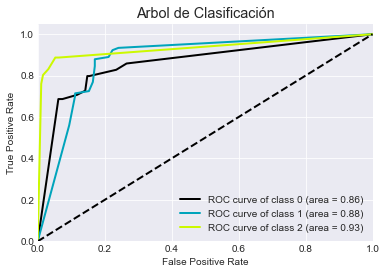

In [114]:
plot_roc(y_test, y_prob_tree, plot_micro = False, plot_macro= False);
plt.title('Arbol de Clasificación')

### Modelo de ensamble

Para el primer modelo de ensamble usaremos como modelos base un Árbol de clasificación, KNN y Naive Bayes.

In [115]:
model_1 = KNeighborsClassifier(n_neighbors=22, weights = "uniform")
# Ajustamos a los datos de entrenamiento.
model_1.fit(X_train, y_train);
fit_1 = model_1.fit(X_train, y_train)
# Predecimos etiquetas para los datos de test.
predict_1 = fit_1.predict(X_test)

In [116]:
#Accuracy
accuracy_1 = round(accuracy_score(y_test, predict_1),3)
print("Accuracy:",accuracy_1)
err_clasif_1 = round((1 - accuracy_score(y_test, predict_1)),3)
#error de clasificación
print("Error de clasificación:", err_clasif_1 )
#Precision
precision_1 = round(precision_score(y_test, predict_1, average='macro'),3)
print("Precision:",precision_1)
#Recall
recall_1 = round(recall_score(y_test, predict_1, average='macro'),3)
print("Recall Score:",recall_1)
#f1-score
f1_score_1 = round(f1_score(y_test, predict_1, average='macro'),3)
print("F1_score:", f1_score_1)

Accuracy: 0.628
Error de clasificación: 0.372
Precision: 0.64
Recall Score: 0.634
F1_score: 0.637


In [117]:
#Conjunto de métricas para comparación
accuracy_modelos.append(accuracy_1)
precision_modelos.append(precision_1)
recall_modelos.append(recall_1)
f1_score_modelos.append(f1_score_1)

In [118]:
from sklearn.metrics import roc_auc_score

y_preb_probs = model_1.predict_proba(X_test)

roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr")

0.7923851471682906

In [119]:
model_2 = GaussianNB()
fit_2 = model_2.fit(X_train, y_train)
predict_2 = fit_2.predict(X_test)


In [120]:
#Accuracy
accuracy_2 = round(accuracy_score(y_test, predict_2),3)
print("Accuracy:",accuracy_2)
err_clasif_2 = round((1 - accuracy_score(y_test, predict_2)),3)
#error de clasificación
print("Error de clasificación:", err_clasif_2)
#Precision
precision_2 = round(precision_score(y_test, predict_2, average='macro'),3)
print("Precision:",precision_2)
#Recall
recall_2 = round(recall_score(y_test, predict_2, average='macro'),3)
print("Recall Score:",recall_2)
#f1-score
f1_score_2 = round(f1_score(y_test, predict_2, average='macro'),3)
print("F1_score:",f1_score_2)

Accuracy: 0.579
Error de clasificación: 0.421
Precision: 0.584
Recall Score: 0.577
F1_score: 0.566


In [121]:
# Conjunto de metricas para comparación:

accuracy_modelos.append(accuracy_2)
precision_modelos.append(precision_2)
recall_modelos.append(recall_2)
f1_score_modelos.append(f1_score_2)

In [122]:
y_preb_probs_2 = model_2.predict_proba(X_test)

roc_auc_score(y_test, y_preb_probs_2, average="weighted", multi_class="ovr")

0.7253862500389907

In [123]:
from sklearn import tree

In [124]:
model_3 = tree.DecisionTreeClassifier(criterion='gini')
fit_3 = model_3.fit(X_train, y_train)
predict_3 = fit_3.predict(X_test)

In [125]:
#Accuracy
accuracy_3 = round(accuracy_score(y_test, predict_3),3)
print("Accuracy:",accuracy_3)
err_clasif_3 = round((1 - accuracy_score(y_test, predict_3)),3)
#error de clasificación
print("Error de clasificación:", err_clasif_3)
#Precision
precision_3 = round(precision_score(y_test, predict_3, average='macro'),3)
print("Precision:",precision_2)
#Recall
recall_3 = round(recall_score(y_test, predict_3, average='macro'),3)
print("Recall Score:",recall_2)
#f1-score
f1_score_3 = round(f1_score(y_test, predict_3, average='macro'),3)
print("F1_score:", f1_score_3)

Accuracy: 0.77
Error de clasificación: 0.23
Precision: 0.584
Recall Score: 0.577
F1_score: 0.779


In [126]:
y_preb_probs_3 = model_3.predict_proba(X_test)

roc_auc_score(y_test, y_preb_probs_3, average="weighted", multi_class="ovr")

0.8840938176709147

In [127]:
#Conjunto de metricas para comparación
accuracy_modelos.append(accuracy_3)
precision_modelos.append(precision_3)
recall_modelos.append(recall_3)
f1_score_modelos.append(f1_score_3)

In [128]:
from scipy.stats import mode
def predict_ensamble(X, model_1, model_2, model_3):
    y_pred_1 = model_1.predict(X)
    y_pred_2 = model_2.predict(X)
    y_pred_3 = model_3.predict(X)
    
    result_mode = mode([y_pred_1, y_pred_2, y_pred_3]).mode
    result = np.transpose(result_mode)    
    return result

In [129]:
#El modelo de árbol de decisión tiene mejor accuracy que el modelo de ensamble
y_pred_ensemble = predict_ensamble(X_test, model_1, model_2, model_3)

Text(0.5, 1.0, 'KNN')

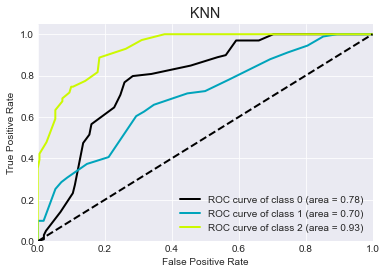

In [130]:
plot_roc(y_test, y_preb_probs, plot_micro = False, plot_macro= False);
plt.title('KNN')

Text(0.5, 1.0, 'Naive Bayes')

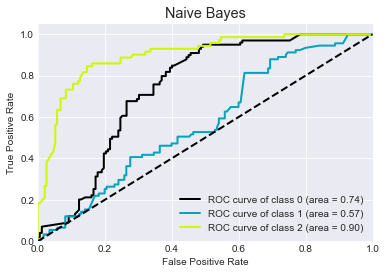

In [131]:
plot_roc(y_test, y_preb_probs_2, plot_micro = False, plot_macro= False);
plt.title('Naive Bayes')

Text(0.5, 1.0, 'Arbol de Clasificación')

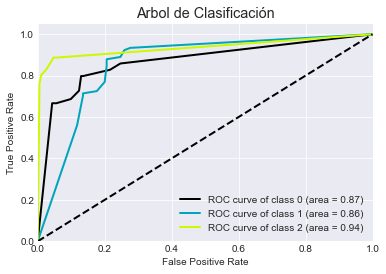

In [132]:
plot_roc(y_test, y_preb_probs_3, plot_micro = False, plot_macro= False);
plt.title('Arbol de Clasificación')

In [133]:
#Accuracy
accuracy_ensamble = round(accuracy_score(y_test, y_pred_ensemble),3)
print("Accuracy:",accuracy_ensamble)
err_clasif_ensamble = round((1 - accuracy_ensamble),3)
#error de clasificación
print("Error de clasificación:", err_clasif_ensamble)
#Precision
precision_ensamble = round(precision_score(y_test, y_pred_ensemble, average='macro'),3)
print("Precision:",precision_ensamble)
#Recall
recall_ensamble = round(recall_score(y_test,y_pred_ensemble, average='macro'),3)
print("Recall Score:",recall_ensamble)
#f1-score
f1_score_ensamble = round(f1_score(y_test, y_pred_ensemble, average='macro'),3)
print("F1_score:", f1_score_ensamble)

Accuracy: 0.693
Error de clasificación: 0.307
Precision: 0.708
Recall Score: 0.694
F1_score: 0.698


In [134]:
# Conjunto de métricas para comparación:

accuracy_modelos.append(accuracy_ensamble)
precision_modelos.append(precision_ensamble)
recall_modelos.append(recall_ensamble)
f1_score_modelos.append(f1_score_ensamble)

### Modelo de Bagging

In [135]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier

In [136]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=127)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=127)

In [137]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[75, 19,  5],
       [17, 68,  6],
       [ 4,  4, 63]], dtype=int64)

In [138]:
y_pred_bag = bag_clf.predict(X_test)
y_prob_bag = bag_clf.predict_proba(X_test)

In [139]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.789272030651341

In [140]:
#Accuracy
accuracy_bag = round(accuracy_score(y_test, y_pred_bag),3)
print("Accuracy:",accuracy_ensamble)
err_clasif_bag = round((1 - accuracy_bag),3)
#error de clasificación
print("Error de clasificación:", err_clasif_ensamble)
#Precision
precision_bag = round(precision_score(y_test, y_pred_bag, average='macro'),3)
print("Precision:",precision_bag)
#Recall
recall_bag = round(recall_score(y_test,y_pred_bag, average='macro'),3)
print("Recall Score:",recall_bag)
#f1-score
f1_score_bag = round(f1_score(y_test, y_pred_bag, average='macro'),3)
print("F1_score:", f1_score_bag)

Accuracy: 0.693
Error de clasificación: 0.307
Precision: 0.793
Recall Score: 0.797
F1_score: 0.795


In [141]:
#Conjunto de metricas para comparación:

accuracy_modelos.append(accuracy_bag)
precision_modelos.append(precision_bag)
recall_modelos.append(recall_bag)
f1_score_modelos.append(f1_score_bag)

Text(0.5, 1.0, 'Bagging')

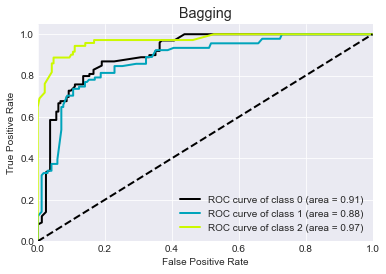

In [142]:
plot_roc(y_test, y_prob_bag, plot_micro = False, plot_macro= False);
plt.title('Bagging')

### Modelo Random forest


In [143]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [144]:
# Entrenemos el modelo random forest de clasificación (incluimos class_weight balanced", las clases se ponderarán de forma inversamente proporcional a la frecuencia con la que aparecen en los datos.)
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, 
                                      criterion='gini', 
                                      max_depth = None, 
                                      bootstrap=True, 
                                      n_jobs = -1, 
                                      random_state = 127,
                                      max_samples= 0.3,
                                      class_weight="balanced")

In [145]:
# Realizamos las predicciones tanto para el dataset de entrenamiento como el de pruebas:

random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_samples=0.3, n_jobs=-1,
                       random_state=127)

In [146]:
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

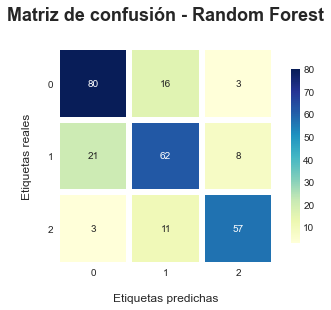

''

In [147]:
#Matriz de confusión
fig, ax = plt.subplots(figsize=(6, 4))

# color map
cmap = "YlGnBu"
#cmap = "YlGnBu" #sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(confusion_matrix(y_test, random_forest.predict(X_test)), annot=True, fmt='.0f',linewidths=5, cmap=cmap, 
           cbar_kws={"shrink": .8}, square=True) 

plt.ylabel('Etiquetas reales\n')
plt.xlabel('\nEtiquetas predichas')

plt.yticks(plt.yticks()[0], rotation=0)
plt.xticks(plt.xticks()[0])

# title
title = 'Matriz de confusión - Random Forest\n'
plt.title(title, loc='center', fontsize=18, fontweight = 'bold')
plt.show()
;

In [148]:
y_pred = random_forest.predict(X_test)
y_prob_rf = random_forest.predict_proba(X_test)

In [149]:
print(classification_report(y_test, y_pred,digits=3, target_names = ['low risk', 'mid risk', 'high risk'])) 

              precision    recall  f1-score   support

    low risk      0.769     0.808     0.788        99
    mid risk      0.697     0.681     0.689        91
   high risk      0.838     0.803     0.820        71

    accuracy                          0.762       261
   macro avg      0.768     0.764     0.766       261
weighted avg      0.763     0.762     0.762       261



In [150]:
#Accuracy
accuracy_random_forest = round(accuracy_score(y_test, y_pred),3)
print("Accuracy:",accuracy_random_forest)
err_clasif_random_forest = round((1 - accuracy_random_forest),3)
#error de clasificación
print("Error de clasificación:", err_clasif_random_forest)
#Precision
precision_random_forest = round(precision_score(y_test, y_pred, average='macro'),3)
print("Precision:",precision_random_forest)
#Recall
recall_random_forest = round(recall_score(y_test,y_pred, average='macro'),3)
print("Recall Score:",recall_random_forest)
#f1-score
f1_score_random_forest = round(f1_score(y_test, y_pred, average='macro'),3)
print("F1_score:",f1_score_random_forest)

Accuracy: 0.762
Error de clasificación: 0.238
Precision: 0.768
Recall Score: 0.764
F1_score: 0.766


In [151]:
# Conjunto de metricas para comparación:

accuracy_modelos.append(accuracy_random_forest)
precision_modelos.append(precision_random_forest)
recall_modelos.append(recall_random_forest)
f1_score_modelos.append(f1_score_random_forest)

Text(0.5, 1.0, 'Random Forest')

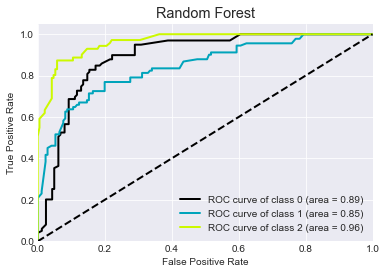

In [152]:
plot_roc(y_test, y_prob_rf, plot_micro = False, plot_macro= False);
plt.title('Random Forest')

### Extra Trees

In [153]:
from sklearn.ensemble import ExtraTreesClassifier

In [154]:
extra_tree = ExtraTreesClassifier(n_estimators = 100,
                                 criterion = 'gini',
                                 class_weight = 'balanced',
                                 max_depth = 5, 
                                 bootstrap = True, 
                                 n_jobs = -1, 
                                 random_state = 171,
                                 max_samples = 0.2)
extra_tree.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_depth=5,
                     max_samples=0.2, n_jobs=-1, random_state=171)

In [155]:
predict_extra_trees = extra_tree.predict(X_test)


In [156]:
accuracy_extra_trees = accuracy_score(y_test, predict_extra_trees)
print(accuracy_extra_trees)

0.6513409961685823


In [157]:
predict_extra_trees_proba = extra_tree.predict_proba(X_test)
predict_extra_trees_class_1 = predict_extra_trees_proba[:, 1]

In [158]:
# Aplicamos GridSearch:

cv = StratifiedKFold(n_splits=3)
param_grid = {
    "n_estimators": [10, 50, 100, 150], 
    "max_depth": [3, 5, 10, 15, 20],
    "max_features": ["auto", "sqrt", "log2"]
    }

In [159]:
extra_tree_grid = GridSearchCV(estimator=extra_tree, scoring='accuracy', cv=cv, param_grid=param_grid, verbose=True)

In [160]:
extra_tree_grid.get_params()

{'cv': StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': 'balanced',
 'estimator__criterion': 'gini',
 'estimator__max_depth': 5,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': 0.2,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': -1,
 'estimator__oob_score': False,
 'estimator__random_state': 171,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_depth=5,
                      max_samples=0.2, n_jobs=-1, random_state=171),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {'n_estimators': [10, 50, 100, 150],
  'max_depth'

In [161]:
extra_tree_grid.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   31.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=ExtraTreesClassifier(bootstrap=True,
                                            class_weight='balanced',
                                            max_depth=5, max_samples=0.2,
                                            n_jobs=-1, random_state=171),
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 150]},
             scoring='accuracy', verbose=True)

In [162]:
print("best params:",extra_tree_grid.best_params_)

best params: {'max_depth': 15, 'max_features': 'auto', 'n_estimators': 150}


In [163]:
y_pred_extra_tree_grid = extra_tree_grid.predict(X_test) 
y_prob_extra_tree_grid = extra_tree_grid.predict_proba(X_test)

In [164]:
#Accuracy
accuracy_extra_tree_grid = round(accuracy_score(y_test, y_pred_extra_tree_grid ),3)
print("Accuracy:",accuracy_extra_tree_grid)
err_clasif_extra_tree_grid = round((1 - accuracy_extra_tree_grid),3)
#error de clasificación
print("Error de clasificación:", err_clasif_extra_tree_grid)
#Precision
precision_extra_tree_grid = round(precision_score(y_test, y_pred_extra_tree_grid, average='macro'),3)
print("Precision:",precision_extra_tree_grid)
#Recall
recall_extra_tree_grid = round(recall_score(y_test, y_pred_extra_tree_grid, average='macro'),3)
print("Recall Score:",recall_extra_tree_grid)
# F1-Score:
f1_score_extra_tree_grid = round(f1_score(y_test, y_pred_extra_tree_grid, average='macro'),3)
print("F1_score:", f1_score_extra_tree_grid)

Accuracy: 0.759
Error de clasificación: 0.241
Precision: 0.763
Recall Score: 0.762
F1_score: 0.76


In [165]:
# Conjunto de metricas para comparación:

accuracy_modelos.append(accuracy_extra_tree_grid)
precision_modelos.append(precision_extra_tree_grid)
recall_modelos.append(recall_extra_tree_grid)
f1_score_modelos.append(f1_score_extra_tree_grid)

In [166]:
# Binarizo el problema:

from sklearn.preprocessing import label_binarize

In [167]:
y_pred_extra_tree_grid = label_binarize(y_pred_extra_tree_grid, classes=[0, 1, 2])

In [168]:
# Auc:

auc_extra_trees = roc_auc_score(y_test, y_pred_extra_tree_grid, multi_class = "ovr")

In [169]:
print("El valor del AUC es: ", auc_extra_trees)

El valor del AUC es:  0.8191132600123526


Text(0.5, 1.0, 'ROC Curve Extra Trees')

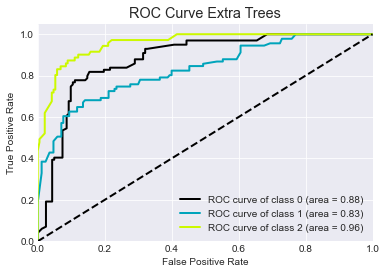

In [170]:
# Curva Roc:

plot_roc(y_test, y_prob_extra_tree_grid, plot_micro = False, plot_macro= False);
plt.title('ROC Curve Extra Trees')

### Modelo Gradient Boosting

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

In [172]:
# De función de pérdida usamos el default que es log_loss:

grad_boost = GradientBoostingClassifier(n_estimators=50, learning_rate=0.3,
                                        subsample=0.5, criterion="friedman_mse", 
                                        max_depth=3, random_state=127)

In [173]:
grad_boost.fit(X_train, y_train) 

GradientBoostingClassifier(learning_rate=0.3, n_estimators=50, random_state=127,
                           subsample=0.5)

In [174]:
# Cuantos estimadores finalmente se crearon durante el entrenamiento:

len(grad_boost.estimators_)

50

In [175]:
y_pred_grad_boost = grad_boost.predict(X_test) 
y_prob_grad_boost = grad_boost.predict_proba(X_test) 

In [176]:
#Accuracy
accuracy_gb = round(accuracy_score(y_test, y_pred_grad_boost),3)
print("Accuracy:",accuracy_gb)
err_clasif_gb = round((1 - accuracy_gb),3)
#error de clasificación
print("Error de clasificación:", err_clasif_gb)
#Precision
precision_gb = round(precision_score(y_test, y_pred_grad_boost, average='macro'),3)
print("Precision:",precision_gb)
#Recall
recall_gb = round(recall_score(y_test,y_pred_grad_boost, average='macro'),3)
print("Recall Score:",recall_gb)
# F1-Score:
print("F1_score:", round(f1_score(y_test, y_pred_grad_boost, average='macro'),3))

Accuracy: 0.797
Error de clasificación: 0.203
Precision: 0.805
Recall Score: 0.8
F1_score: 0.802


In [177]:
# Tueneamos los hiperparámetros:

params_gb = {'n_estimators':[10, 50, 100, 150] , 
             'learning_rate':[0.001, 0.001, 0.1, 0.2, 0.3, 0.4],
            'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid_gb = GridSearchCV(grad_boost, param_grid=params_gb, cv=5, verbose=1, n_jobs=3)

In [178]:
# Fiteamos el nuevo modelo:

grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    6.7s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  5.2min
[Parallel(n_jobs=3)]: Done 1080 out of 1080 | elapsed:  7.2min finished


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.3,
                                                  n_estimators=50,
                                                  random_state=127,
                                                  subsample=0.5),
             n_jobs=3,
             param_grid={'learning_rate': [0.001, 0.001, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150]},
             verbose=1)

In [179]:
grid_gb.best_params_, grid_gb.best_score_

({'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150},
 0.8449275362318842)

In [180]:
y_pred_grid_gb = grid_gb.predict(X_test)

In [181]:
# Reporte de clasificación:

print(classification_report(y_test, y_pred_grid_gb,digits=3, target_names = ['low risk', 'mid risk', 'high risk']))

              precision    recall  f1-score   support

    low risk      0.776     0.768     0.772        99
    mid risk      0.756     0.747     0.751        91
   high risk      0.849     0.873     0.861        71

    accuracy                          0.789       261
   macro avg      0.793     0.796     0.795       261
weighted avg      0.789     0.789     0.789       261



In [182]:
#Accuracy
accuracy_grid_gb = round(accuracy_score(y_test, y_pred_grid_gb),3)
print("Accuracy:",accuracy_grid_gb)
err_clasif_grid_gb = round((1 - accuracy_gb),3)
#error de clasificación
print("Error de clasificación:", err_clasif_grid_gb)
#Precision
precision_grid_gb = round(precision_score(y_test, y_pred_grid_gb, average='macro'),3)
print("Precision:",precision_grid_gb)
#Recall
recall_grid_gb = round(recall_score(y_test,y_pred_grid_gb, average='macro'),3)
print("Recall Score:",recall_grid_gb)
# F1-Score:
f1_score_grid_gb = round(f1_score(y_test, y_pred_grid_gb, average='macro'),3)
print("F1_score:", f1_score_grid_gb)

Accuracy: 0.789
Error de clasificación: 0.203
Precision: 0.793
Recall Score: 0.796
F1_score: 0.795


In [183]:
#Conjunto de metricas para comparación
accuracy_modelos.append(accuracy_grid_gb)
precision_modelos.append(precision_grid_gb)
recall_modelos.append(recall_grid_gb)
f1_score_modelos.append(f1_score_grid_gb)

In [184]:
from scikitplot.metrics import plot_roc

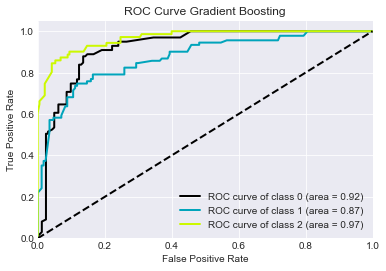

In [185]:
plot_roc(y_test, y_prob_grad_boost, plot_micro = False, plot_macro= False, classes_to_plot=None, title = 'ROC Curve Gradient Boosting')
plt.legend()

### Modelo XG BOOST

In [186]:
from xgboost.sklearn import XGBClassifier

In [187]:
xgb = XGBClassifier(use_label_encoder=False, objettive ='binary: logistic')

In [188]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'objettive': 'binary: logistic'}

In [189]:
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

In [190]:
params = {  
    "n_estimators": [30,40,50,60,100], 
    "max_depth": [3,4,5,6],            
    "learning_rate": [0.3,0.4,0.5,0.6,0.7],      
    'gamma' : [0,0.25,1.0],
}

In [191]:
xgb_grid = GridSearchCV(xgb, param_grid=params, cv=cv, verbose=0, n_jobs=-1, scoring="accuracy")

In [192]:
# Ajuste del modelo
XGB_FIT = xgb_grid.fit(X_train,y_train)

[23:33:01] WARNING: ..\src\learner.cc:573: 
Parameters: { "objettive" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:33:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [193]:
xgb_grid.best_params_

{'gamma': 0, 'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 100}

In [194]:
# Predicción de etiquetas del conjunto de datos de test

y_pred_xgb = xgb_grid.predict(X_test)
y_prob_xgb = xgb_grid.predict_proba(X_test)

y_train_pred_xgb = xgb_grid.predict(X_train)

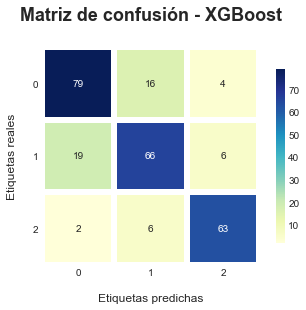

''

In [195]:
#Matriz de confusión
fig, ax = plt.subplots(figsize=(6, 4))

# color map
cmap = "YlGnBu"
#cmap = "YlGnBu" #sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(confusion_matrix(y_test, xgb_grid.predict(X_test)), annot=True, fmt='.0f',linewidths=5, cmap=cmap, 
           cbar_kws={"shrink": .8}, square=True) 

plt.ylabel('Etiquetas reales\n')
plt.xlabel('\nEtiquetas predichas')

plt.yticks(plt.yticks()[0], rotation=0)
plt.xticks(plt.xticks()[0])

# title
title = 'Matriz de confusión - XGBoost\n'
plt.title(title, loc='center', fontsize=18, fontweight = 'bold')
plt.show()
;

In [196]:
# Reporte de clasificación 
print(classification_report(y_test, y_pred_xgb,digits=3, target_names = ['low risk', 'mid risk', 'high risk']))

              precision    recall  f1-score   support

    low risk      0.790     0.798     0.794        99
    mid risk      0.750     0.725     0.737        91
   high risk      0.863     0.887     0.875        71

    accuracy                          0.797       261
   macro avg      0.801     0.804     0.802       261
weighted avg      0.796     0.797     0.796       261



In [197]:
#Accuracy
accuracy_xgb = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb)
#error de clasificación
err_clasif_xgb = round((1 - accuracy_xgb),3)
print("Error de clasificación:", err_clasif_xgb)
#Precision
precision_xgb = round(precision_score(y_test, y_pred_xgb, average='macro'),3)
print("Precision:",precision_xgb)
#Recall
recall_xgb = round(recall_score(y_test, y_pred_xgb, average='macro'),3)
print("Recall Score:",recall_xgb)
# F1-Score:
f1_score_xgb = round(f1_score(y_test, y_pred_xgb, average='macro'),3)
print("F1_score:", f1_score_xgb)

Accuracy: 0.797
Error de clasificación: 0.203
Precision: 0.801
Recall Score: 0.804
F1_score: 0.802


In [198]:
#Conjunto de metricas para comparación
accuracy_modelos.append(accuracy_xgb)
precision_modelos.append(precision_xgb)
recall_modelos.append(recall_xgb)
f1_score_modelos.append(f1_score_xgb)

In [199]:
y_pred_xgb = label_binarize(y_pred_xgb, classes=[0, 1, 2])

In [200]:
xgb_auc = roc_auc_score(y_test, y_pred_xgb, multi_class ='ovr')

print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.8498175822722692


* ROC

Text(0.5, 1.0, 'ROC Curve XGB')

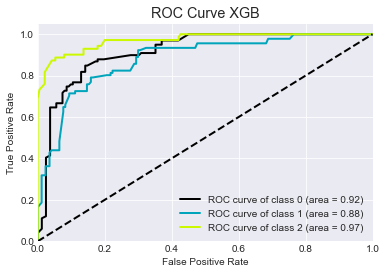

In [201]:
from scikitplot.metrics import plot_roc

plot_roc(y_test, y_prob_xgb, plot_micro = False, plot_macro= False);
plt.title('ROC Curve XGB')
# plt.legend(['Low Risk','Mid Risk','High Risk'])

### Modelo LightGBM

In [202]:
import lightgbm as lgb

In [203]:
# Creo generador de Cross-Validation:

cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

In [204]:
# Instancio el modelo LightGBM:

model_lgb = lgb.LGBMClassifier()

In [205]:
# Optimizamos los hiperparámetros:

params = {  
    "n_estimators": [10,50,100,150,200,250],      
    "max_depth": [1,2,3,4,5,6,7,8],
    "multiclass"  
    "multi_logloss" 
    "learning_rate": [0.01,0.05,0.08,0.1],      
}

In [206]:
grid_lgb = GridSearchCV(model_lgb, param_grid=params, verbose=1, n_jobs=-1)

In [207]:
grid_lgb.fit(X_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 742 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.6min finished


[LightGBM] [Warning] Unknown parameter: multiclassmulti_loglosslearning_rate


GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'multiclassmulti_loglosslearning_rate': [0.01, 0.05,
                                                                  0.08, 0.1],
                         'n_estimators': [10, 50, 100, 150, 200, 250]},
             verbose=1)

In [208]:
grid_lgb.best_params_

{'max_depth': 6,
 'multiclassmulti_loglosslearning_rate': 0.01,
 'n_estimators': 150}

In [209]:
from sklearn.model_selection import cross_val_score

In [210]:
# Evalúo el rendimiento del estimador optimo, utilizando cross validation:

def evaluar_rendimiento(modelo, nombre, X, y, cv):
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [211]:
evaluar_rendimiento(grid_lgb.best_estimator_,"Light GBM", X_train, y_train, cv=cv)

Rendimiento de Light GBM:	0.852 ± 0.031


In [212]:
# Predicción en el set de testeo:

y_pred_lgb=grid_lgb.predict(X_test)
y_prob_lgb = grid_lgb.predict_proba(X_test)
y_train_pred_lgb = grid_lgb.predict(X_train)

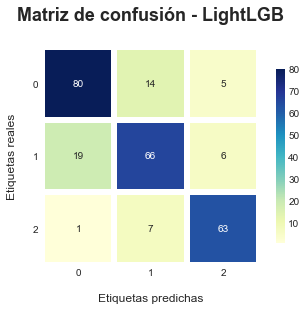

''

In [213]:
#Matriz de confusión
fig, ax = plt.subplots(figsize=(6, 4))

# color map
cmap = "YlGnBu"
#cmap = "YlGnBu" #sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(confusion_matrix(y_test, grid_lgb.predict(X_test)), annot=True, fmt='.0f',linewidths=5, cmap=cmap, 
           cbar_kws={"shrink": .8}, square=True) 

plt.ylabel('Etiquetas reales\n')
plt.xlabel('\nEtiquetas predichas')

plt.yticks(plt.yticks()[0], rotation=0)
plt.xticks(plt.xticks()[0])

# title
title = 'Matriz de confusión - LightLGB\n'
plt.title(title, loc='center', fontsize=18, fontweight = 'bold')
plt.show()
;

In [214]:
# Reporte de clasificación:

print(classification_report(y_test, y_pred_lgb,digits=3, target_names = ['low risk', 'mid risk', 'high risk']))

              precision    recall  f1-score   support

    low risk      0.800     0.808     0.804        99
    mid risk      0.759     0.725     0.742        91
   high risk      0.851     0.887     0.869        71

    accuracy                          0.801       261
   macro avg      0.803     0.807     0.805       261
weighted avg      0.800     0.801     0.800       261



In [215]:
#Accuracy
accuracy_lgb = round(accuracy_score(y_test, y_pred_lgb),3)
print("Accuracy:",accuracy_lgb)
#error de clasificación
err_clasif_lgb = round((1 - accuracy_lgb),3)
print("Error de clasificación:", err_clasif_lgb)
#Precision
precision_lgb = round(precision_score(y_test, y_pred_lgb, average='macro'),3)
print("Precision:",precision_lgb)
#Recall
recall_lgb = round(recall_score(y_test, y_pred_lgb, average='macro'),3)
print("Recall Score:",recall_lgb)
# F1-Score:
f1_score_lgb = round(f1_score(y_test, y_pred_lgb, average='macro'),3)
print("F1_score:", f1_score_lgb)

Accuracy: 0.801
Error de clasificación: 0.199
Precision: 0.803
Recall Score: 0.807
F1_score: 0.805


In [216]:
#Conjunto de metricas para comparación
accuracy_modelos.append(accuracy_lgb)
precision_modelos.append(precision_lgb)
recall_modelos.append(recall_lgb)
f1_score_modelos.append(f1_score_lgb)

In [217]:
y_pred_lgb = label_binarize(y_pred_lgb, classes=[0, 1, 2])

In [218]:
lgbm_auc = roc_auc_score(y_test, y_pred_lgb, multi_class ='ovr')
print("El valor del AUC es: ", lgbm_auc)

El valor del AUC es:  0.8526330897145394


Text(0.5, 1.0, 'ROC Curve LightGBM')

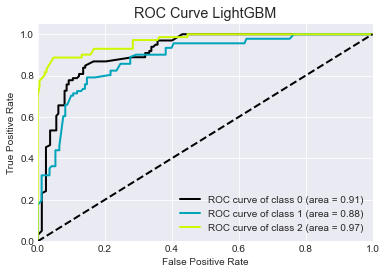

In [219]:
plot_roc(y_test, y_prob_lgb, plot_micro = False, plot_macro= False);
plt.title('ROC Curve LightGBM')

## Pipelines

In [220]:
from sklearn.pipeline import Pipeline

### Pipeline base: StandardScaler + Random Forest

In [221]:
#PIPELINE - Lista de pasos 
pasos = [('scaler',StandardScaler()), ('estimator', RandomForestClassifier(bootstrap=True, random_state=127))]
#Instanciamos pipeline con los pasos que definimos en el punto anterior:
pipe = Pipeline(pasos)
#Generalización del modelo y accuracy_score
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator', RandomForestClassifier(random_state=127))])

In [222]:
# Generalización del modelo:
pipe.score(X_test,y_test)

0.7969348659003831

### Pipeline 1: trabajo en 3 pasos ( StandardScaler + GridSearch + Modelo RF)

In [223]:
#Lista de pasos 
pasos = [('scaler', StandardScaler()), ('estimator', RandomForestClassifier(random_state=127))]

In [224]:
pipe_grid = Pipeline(pasos)

In [225]:
# Definimos los KFold del esquema de validación:

from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=10,shuffle=True, random_state=127)

In [226]:
param_grid = {
    'estimator__max_depth': [3, 5, 10, 50, 75, 100], 
 'estimator__n_estimators': [5,25,50,75],
}

In [227]:
rf = RandomForestClassifier(bootstrap=True, random_state=127)

In [228]:
grid_search = GridSearchCV(pipe_grid, param_grid = param_grid, 
                          cv = folds, n_jobs = -1)

In [229]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=127, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('estimator',
                                        RandomForestClassifier(random_state=127))]),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [3, 5, 10, 50, 75, 100],
                         'estimator__n_estimators': [5, 25, 50, 75]})

In [230]:
grid_search.best_params_

{'estimator__max_depth': 50, 'estimator__n_estimators': 25}

In [231]:
grid_search.best_score_

0.8565217391304347

In [232]:
grid_search.best_estimator_.score(X_test,y_test)

0.8007662835249042

In [233]:
accuracy_score(grid_search.best_estimator_.predict(X_test),y_test)

0.8007662835249042

### Pipeline 3 - Preprocesamiento (SS/MinMax/None) + GridSearch + Modelo KNN

In [234]:
#Combinamos grillas para elegir cuál es la mejor configuración entre pasos de preprocesamiento y configuración de modelos evaluamos es si el modelo es mejor incluyendo el StandardScaler o el MinMaxScaler o  ninguna normalización)

In [235]:
from sklearn.preprocessing import MinMaxScaler

In [236]:
pasos = [('peprocesamiento', StandardScaler()), ('clasificador', KNeighborsClassifier())]
pipe_grid_tres = Pipeline(pasos)

In [237]:
new_param_grid = [{'peprocesamiento':[StandardScaler(), MinMaxScaler(), None], 
                   'clasificador__n_neighbors':range(2,20,2), 'clasificador__weights':['uniform','distance']}]        

In [238]:
grid_tres=GridSearchCV(pipe_grid_tres, new_param_grid, cv=folds)
grid_tres.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=127, shuffle=True),
             estimator=Pipeline(steps=[('peprocesamiento', StandardScaler()),
                                       ('clasificador',
                                        KNeighborsClassifier())]),
             param_grid=[{'clasificador__n_neighbors': range(2, 20, 2),
                          'clasificador__weights': ['uniform', 'distance'],
                          'peprocesamiento': [StandardScaler(), MinMaxScaler(),
                                              None]}])

In [239]:
grid_tres.best_score_

0.8304347826086957

In [240]:
grid_tres.best_estimator_

Pipeline(steps=[('peprocesamiento', None),
                ('clasificador',
                 KNeighborsClassifier(n_neighbors=4, weights='distance'))])

In [241]:
accuracy_score(grid_tres.best_estimator_.predict(X_test), y_test)

0.7624521072796935

### Pipeline 4: Feature Selection + Preprocesamiento (MinMaxScaler) + GridSearch + Modelo KNN

In [242]:
from sklearn.base import BaseEstimator, TransformerMixin

<AxesSubplot:>

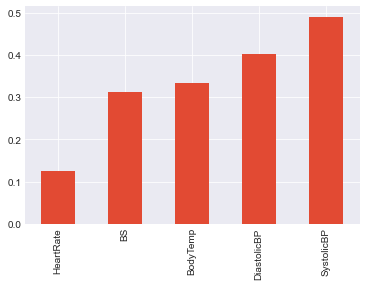

In [243]:
import matplotlib.pyplot as plt

features=abs(data.corr(method='spearman'))['Age'].drop(index='Age').sort_values()
features.plot(kind='bar')

In [244]:
class FeatureSelection(BaseEstimator, TransformerMixin):
    
   
    def __init__(self,selected_features):
        self.selected_features=selected_features
    
    
    def fit(self,X,y=None):
        return self
    
    
    def transform(self, X, y=None):
        return X[self.selected_features]

In [245]:
# generamos una copia del dataset
X_prueba=X.copy()

X_prueba.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25.0,130,80.0,15.0,36.67,86.0
1,35.0,140,90.0,13.0,36.67,70.0
2,29.0,90,70.0,8.0,37.78,80.0
3,30.0,140,85.0,7.0,36.67,70.0
4,35.0,120,60.0,6.1,36.67,76.0


In [246]:
# Instanciamos la nueva clase, y pasamos cuáles son las features que queremos seleccionar

seleccionador=FeatureSelection(selected_features=['Age','SystolicBP','BS','DiastolicBP','BodyTemp'])

In [247]:
# Método fit_transform para ver el resultado de aplicar nuestro nuevo objeto en los datos

seleccionador.fit_transform(X_prueba).head()

,Age,SystolicBP,BS,DiastolicBP,BodyTemp
0,25.0,130,15.0,80.0,36.67
1,35.0,140,13.0,90.0,36.67
2,29.0,90,8.0,70.0,37.78
3,30.0,140,7.0,85.0,36.67
4,35.0,120,6.1,60.0,36.67


In [248]:
pasos = [('feature_engineering',FeatureSelection(selected_features=features[features>0.2].index.values)),
         ('peprocesamiento', MinMaxScaler()), 
         ('clasificador', KNeighborsClassifier(n_neighbors=4))]

pipe_grid_cuatro=Pipeline(pasos)

In [249]:
new_param_grid = [{'clasificador__n_neighbors':range(2,20,2), 'clasificador__weights':['uniform','distance']}]

In [250]:
len(X_train)

690

In [251]:
len(y_train)

690

In [252]:
grid_cuatro=GridSearchCV(pipe_grid_cuatro, new_param_grid, cv=folds)
grid_cuatro.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=127, shuffle=True),
             estimator=Pipeline(steps=[('feature_engineering',
                                        FeatureSelection(selected_features=array(['BS', 'BodyTemp', 'DiastolicBP', 'SystolicBP'], dtype=object))),
                                       ('peprocesamiento', MinMaxScaler()),
                                       ('clasificador',
                                        KNeighborsClassifier(n_neighbors=4))]),
             param_grid=[{'clasificador__n_neighbors': range(2, 20, 2),
                          'clasificador__weights': ['uniform', 'distance']}])

In [253]:
grid_cuatro.best_score_

0.7782608695652173

In [254]:
grid_cuatro.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureSelection(selected_features=array(['BS', 'BodyTemp', 'DiastolicBP', 'SystolicBP'], dtype=object))),
                ('peprocesamiento', MinMaxScaler()),
                ('clasificador',
                 KNeighborsClassifier(n_neighbors=8, weights='distance'))])

In [255]:
grid_cuatro.score(X_test,y_test)

0.7854406130268199

In [256]:
accuracy_score(grid_cuatro.best_estimator_.predict(X_test), y_test)

0.7854406130268199

In [257]:
# Generar una nueva feature que sea el ratio entre dos variables de las seleccionadas:

class FeatureDivision(BaseEstimator, TransformerMixin):
    
    def __init__(self,columna_dividendo,columna_divisor):
        self.columna_dividendo=columna_dividendo
        self.columna_divisor=columna_divisor
        
    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return pd.DataFrame(X[self.columna_dividendo]/X[self.columna_divisor],
                            index=X.index.values,
                            columns=[self.columna_dividendo+'_'+self.columna_divisor])

### Pipeline 5: Feature Union + preprocesamiento + Gridsearch + Modelo KNN

In [258]:
from sklearn.pipeline import FeatureUnion

In [259]:
pasos= [('feature_engineering',FeatureUnion([('select',FeatureSelection(selected_features=features[features>0.2].index.values)),
                                             ('div',FeatureDivision(columna_dividendo='SystolicBP', columna_divisor='BodyTemp'))])),
        ('preprocesamiento',MinMaxScaler()),
        ('clasificador',KNeighborsClassifier())]

In [260]:
pipe_grid_cinco=Pipeline(pasos)

new_param_grid = [{'clasificador__n_neighbors':range(2,20,2), 'clasificador__weights':['uniform','distance']}]

grid_cinco=GridSearchCV(pipe_grid_cinco, new_param_grid, cv=folds)

grid_cinco.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=127, shuffle=True),
             estimator=Pipeline(steps=[('feature_engineering',
                                        FeatureUnion(transformer_list=[('select',
                                                                        FeatureSelection(selected_features=array(['BS', 'BodyTemp', 'DiastolicBP', 'SystolicBP'], dtype=object))),
                                                                       ('div',
                                                                        FeatureDivision(columna_dividendo='SystolicBP',
                                                                                        columna_divisor='BodyTemp'))])),
                                       ('preprocesamiento', MinMaxScaler()),
                                       ('clasificador',
                                        KNeighborsClassifier())]),
             param_grid=[{'clasificador__n_neighbors': range(2, 20, 2),
      

In [261]:
grid_cinco.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('select',
                                                 FeatureSelection(selected_features=array(['BS', 'BodyTemp', 'DiastolicBP', 'SystolicBP'], dtype=object))),
                                                ('div',
                                                 FeatureDivision(columna_dividendo='SystolicBP',
                                                                 columna_divisor='BodyTemp'))])),
                ('preprocesamiento', MinMaxScaler()),
                ('clasificador',
                 KNeighborsClassifier(n_neighbors=10, weights='distance'))])

In [262]:
grid_cinco.best_score_

0.7782608695652173

In [263]:
grid_cinco.best_estimator_.score(X_test,y_test)

0.7777777777777778

In [264]:
# Pasos feature engineering

In [265]:
# Primer FeatureUnion: seleccionamos las variables con correlación mayor a 0.2, y estimamos el ratio entre SystolicBP y BodyTemp

union=FeatureUnion([('select',FeatureSelection(selected_features=features[features>0.2].index.values)),
                    ('div',FeatureDivision(columna_dividendo='SystolicBP', columna_divisor='BodyTemp'))])

In [266]:
# Segundo FeatureUnion: seleccionamos las variables con correlación mayor a 0.02, y estimamos el ratio entre "SystolicBP'" y "HeartRate"
union_dos=FeatureUnion([('select',FeatureSelection(selected_features=features[features>0.2].index.values)),
                        ('div',FeatureDivision(columna_dividendo='SystolicBP', columna_divisor='BS'))])

In [267]:
pasos= [('feature_engineering',union),
        ('preprocesamiento',MinMaxScaler()),
        ('clasificador',KNeighborsClassifier())]

pipe_grid_cinco_u=Pipeline(pasos)

In [268]:
new_param_grid = [{'feature_engineering':[union,union_dos,None],
                   'preprocesamiento':[StandardScaler(), MinMaxScaler(), None],
                   'clasificador__n_neighbors':range(2,20,2), 'clasificador__weights':['uniform','distance']}]

grid_cinco_u=GridSearchCV(pipe_grid_cinco_u, new_param_grid, cv=folds)

grid_cinco_u.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=127, shuffle=True),
             estimator=Pipeline(steps=[('feature_engineering',
                                        FeatureUnion(transformer_list=[('select',
                                                                        FeatureSelection(selected_features=array(['BS', 'BodyTemp', 'DiastolicBP', 'SystolicBP'], dtype=object))),
                                                                       ('div',
                                                                        FeatureDivision(columna_dividendo='SystolicBP',
                                                                                        columna_divisor='BodyTemp'))]...
                                                                                  FeatureDivision(columna_dividendo='SystolicBP',
                                                                                                  columna_divisor='BodyTemp'))]),
                  

In [269]:
grid_cinco_u.best_estimator_

Pipeline(steps=[('feature_engineering', None), ('preprocesamiento', None),
                ('clasificador',
                 KNeighborsClassifier(n_neighbors=4, weights='distance'))])

In [270]:
grid_cinco_u.best_score_

0.8304347826086957

In [271]:
grid_cinco_u.best_estimator_.score(X_test,y_test)

0.7624521072796935

In [272]:
grid_cinco_u.best_score_

0.8304347826086957

## Evaluación de Modelos de Clasificación

In [273]:
# Listado de los modelos:
listado_modelos=['Reg_log','KNN_grid','Naive Bayes','Arbol_entrophy','KNN', 'Naive Bayes','Arbol_gini','Ensamble*','Bagging','Random Forest','Extra Trees','Gradient Boosting','XGBoost','LightGBM']

<Figure size 2160x2160 with 0 Axes>

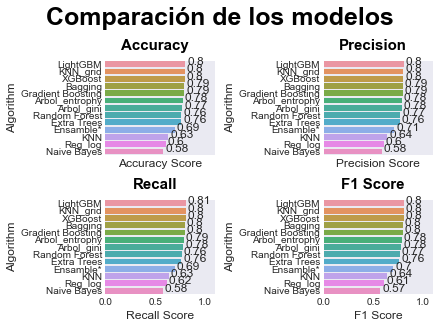

In [274]:
y_ticks=np.arange(len(listado_modelos))

# Generamos un df con la lista de algoritmos y la lista de puntajes 
df_accuracy=pd.DataFrame(list(zip(listado_modelos, accuracy_modelos)), columns=['Algorithm','Accuracy Score']).sort_values(by=['Accuracy Score'],ascending = False)
df_precision=pd.DataFrame(list(zip(listado_modelos, precision_modelos)), columns=['Algorithm','Precision Score']).sort_values(by=['Precision Score'],ascending = False)
df_recall=pd.DataFrame(list(zip(listado_modelos, recall_modelos)), columns=['Algorithm','Recall Score']).sort_values(by=['Recall Score'],ascending = False)
df_F1_score=pd.DataFrame(list(zip(listado_modelos, f1_score_modelos)), columns=['Algorithm','F1 Score']).sort_values(by=['F1 Score'],ascending = False)

# Visualización del grafico
fig = plt.figure(figsize=(50,20))
fig.set_size_inches(30,30)

fig, ax = plt.subplots(2,2, sharex =True, constrained_layout=True)

accuracy = sns.barplot(x = df_accuracy['Accuracy Score'], y=df_accuracy['Algorithm'], data=df_accuracy, ax = ax[0,0])
precision = sns.barplot(x = df_precision['Precision Score'], y=df_precision['Algorithm'], data=df_precision, ax=ax[0,1])
recall = sns.barplot(x = df_recall['Recall Score'], y=df_recall['Algorithm'], data=df_recall, ax=ax[1,0])
F1_score = sns.barplot(x = df_F1_score['F1 Score'], y=df_F1_score['Algorithm'], data=df_F1_score, ax=ax[1,1])

#Numeros en las barras
for i in accuracy.patches:
    accuracy.text(i.get_width()+0.02, i.get_y()+0.5, str(round(i.get_width(),2)), fontsize=12)
for i in precision.patches:
    precision.text(i.get_width()+0.02, i.get_y()+0.5, str(round(i.get_width(),2)), fontsize=12)
for i in recall.patches:
    recall.text(i.get_width()+0.02, i.get_y()+0.5, str(round(i.get_width(),2)), fontsize=12)
for i in F1_score.patches:
    F1_score.text(i.get_width()+0.02, i.get_y()+0.5, str(round(i.get_width(),2)), fontsize=12)

plt.xlim(0,1.1)
plt.suptitle('Comparación de los modelos', size=25, color='black',weight = 'bold',y=1.1)
ax[0,0].set_title("Accuracy", size=15, color='black',weight = 'bold',y=1.05, x=0.45)
ax[0,1].set_title("Precision", size=15, color='black',weight = 'bold',y=1.05, x=0.45)
ax[1,0].set_title("Recall", size=15, color='black',weight = 'bold',y=1.05, x=0.45)
ax[1,1].set_title("F1 Score", size=15, color='black',weight = 'bold',y=1.05, x=0.45)

accuracy.grid(False)
precision.grid(False)
recall.grid(False)
F1_score.grid(False)
plt.show()

## Curvas ROC y AUC

In [275]:
from sklearn import metrics
from sklearn.metrics import roc_curve

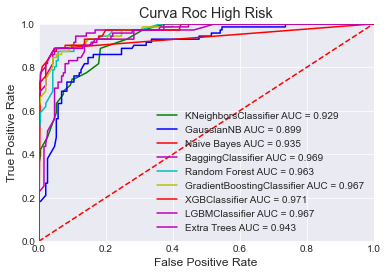

In [276]:
# Calcularemos la curva ROC y el área bajo la curva para el clasificador KNeighborsClassifier
probs1 = model_1.predict_proba(X_test)
fpr1, tpr1, threshold =roc_curve(y_test, probs1[:,2], pos_label=2)
roc_auc1 = metrics.auc(fpr1, tpr1)

# Calcularemos la curva ROC y el área bajo la curva para el clasificador GaussianNB
probs2 = model_2.predict_proba(X_test)
fpr2, tpr2, threshold =roc_curve(y_test, probs2[:,2], pos_label=2)
roc_auc2 = metrics.auc(fpr2, tpr2)


# Calcularemos la curva ROC y el área bajo la curva para el clasificador Naive Bayes
probs3 = model_3.predict_proba(X_test)
fpr3, tpr3, threshold =roc_curve(y_test, probs3[:,2], pos_label=2)
roc_auc3 = metrics.auc(fpr3, tpr3)


# Calcularemos la curva ROC y el área bajo la curva para el clasificador BaggingClassifier
probs4 = bag_clf.predict_proba(X_test)
fpr4, tpr4, threshold =roc_curve(y_test, probs4[:,2], pos_label=2)
roc_auc4 = metrics.auc(fpr4, tpr4) 


# Calcularemos la curva ROC y el área bajo la curva para el clasificador Random Forest
probs5 = random_forest.predict_proba(X_test)
fpr5, tpr5, threshold =roc_curve(y_test, probs5[:,2], pos_label=2)
roc_auc5 = metrics.auc(fpr5, tpr5)


# Calcularemos la curva ROC y el área bajo la curva para el clasificador GradientBoostingClassifier
probs6 = grad_boost.predict_proba(X_test)
fpr6, tpr6, threshold =roc_curve(y_test, probs6[:,2], pos_label=2)
roc_auc6 = metrics.auc(fpr6, tpr6)

# Calcularemos la curva ROC y el área bajo la curva para el clasificador XGBClassifier
probs7 = xgb_grid.predict_proba(X_test)
fpr7, tpr7, threshold =roc_curve(y_test, probs7[:,2], pos_label=2)
roc_auc7 = metrics.auc(fpr7, tpr7)

# Calcularemos la curva ROC y el área bajo la curva para el clasificador LGBMClassifier
probs8 = grid_lgb.predict_proba(X_test)
fpr8, tpr8, threshold =roc_curve(y_test, probs8[:,2], pos_label=2)
roc_auc8 = metrics.auc(fpr8, tpr8)

# Calcularemos la curva ROC y el área bajo la curva para el clasificador Extra Trees
probs9 = extra_tree.predict_proba(X_test)
fpr9, tpr9, threshold =roc_curve(y_test, probs9[:,2], pos_label=2)
roc_auc9 = metrics.auc(fpr9, tpr9)

plt.title('Curva Roc High Risk')
plt.plot(fpr1, tpr1, 'g', label = 'KNeighborsClassifier AUC = %0.3f' % roc_auc1)
plt.plot(fpr2, tpr2, 'b', label = 'GaussianNB AUC = %0.3f' % roc_auc2)
plt.plot(fpr3, tpr3, 'r', label = 'Naive Bayes AUC = %0.3f' % roc_auc3)
plt.plot(fpr4, tpr4, 'm', label = 'BaggingClassifier AUC = %0.3f' % roc_auc4)
plt.plot(fpr5, tpr5, 'c', label = 'Random Forest AUC = %0.3f' % roc_auc5)
plt.plot(fpr6, tpr6, 'y', label = 'GradientBoostingClassifier AUC = %0.3f' % roc_auc6)
plt.plot(fpr7, tpr7, 'r', label = 'XGBClassifier AUC = %0.3f' % roc_auc7)
plt.plot(fpr8, tpr8, 'm', label = 'LGBMClassifier AUC = %0.3f' % roc_auc8)
plt.plot(fpr9, tpr9, 'm', label = 'Extra Trees AUC = %0.3f' % roc_auc9)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

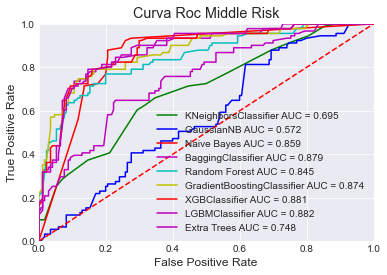

In [277]:
# Calcularemos la curva ROC y el área bajo la curva para el clasificador KNeighborsClassifier
probs1 = model_1.predict_proba(X_test)
fpr1, tpr1, threshold =roc_curve(y_test, probs1[:,1], pos_label=1)
roc_auc1 = metrics.auc(fpr1, tpr1)

# Calcularemos la curva ROC y el área bajo la curva para el clasificador GaussianNB
probs2 = model_2.predict_proba(X_test)
fpr2, tpr2, threshold =roc_curve(y_test, probs2[:,1], pos_label=1)
roc_auc2 = metrics.auc(fpr2, tpr2)


# Calcularemos la curva ROC y el área bajo la curva para el clasificador Naive Bayes
probs3 = model_3.predict_proba(X_test)
fpr3, tpr3, threshold =roc_curve(y_test, probs3[:,1], pos_label=1)
roc_auc3 = metrics.auc(fpr3, tpr3)


# Calcularemos la curva ROC y el área bajo la curva para el clasificador BaggingClassifier
probs4 = bag_clf.predict_proba(X_test)
fpr4, tpr4, threshold =roc_curve(y_test, probs4[:,1], pos_label=1)
roc_auc4 = metrics.auc(fpr4, tpr4) 


# Calcularemos la curva ROC y el área bajo la curva para el clasificador Random Forest
probs5 = random_forest.predict_proba(X_test)
fpr5, tpr5, threshold =roc_curve(y_test, probs5[:,1], pos_label=1)
roc_auc5 = metrics.auc(fpr5, tpr5)


# Calcularemos la curva ROC y el área bajo la curva para el clasificador GradientBoostingClassifier
probs6 = grad_boost.predict_proba(X_test)
fpr6, tpr6, threshold =roc_curve(y_test, probs6[:,1], pos_label=1)
roc_auc6 = metrics.auc(fpr6, tpr6)

# Calcularemos la curva ROC y el área bajo la curva para el clasificador XGBClassifier
probs7 = xgb_grid.predict_proba(X_test)
fpr7, tpr7, threshold =roc_curve(y_test, probs7[:,1], pos_label=1)
roc_auc7 = metrics.auc(fpr7, tpr7)

# Calcularemos la curva ROC y el área bajo la curva para el clasificador LGBMClassifier
probs8 = grid_lgb.predict_proba(X_test)
fpr8, tpr8, threshold =roc_curve(y_test, probs8[:,1], pos_label=1)
roc_auc8 = metrics.auc(fpr8, tpr8)

# Calcularemos la curva ROC y el área bajo la curva para el clasificador Extra Trees
probs9 = extra_tree.predict_proba(X_test)
fpr9, tpr9, threshold =roc_curve(y_test, probs9[:,1], pos_label=1)
roc_auc9 = metrics.auc(fpr9, tpr9)

plt.title('Curva Roc Middle Risk')
plt.plot(fpr1, tpr1, 'g', label = 'KNeighborsClassifier AUC = %0.3f' % roc_auc1)
plt.plot(fpr2, tpr2, 'b', label = 'GaussianNB AUC = %0.3f' % roc_auc2)
plt.plot(fpr3, tpr3, 'r', label = 'Naive Bayes AUC = %0.3f' % roc_auc3)
plt.plot(fpr4, tpr4, 'm', label = 'BaggingClassifier AUC = %0.3f' % roc_auc4)
plt.plot(fpr5, tpr5, 'c', label = 'Random Forest AUC = %0.3f' % roc_auc5)
plt.plot(fpr6, tpr6, 'y', label = 'GradientBoostingClassifier AUC = %0.3f' % roc_auc6)
plt.plot(fpr7, tpr7, 'r', label = 'XGBClassifier AUC = %0.3f' % roc_auc7)
plt.plot(fpr8, tpr8, 'm', label = 'LGBMClassifier AUC = %0.3f' % roc_auc8)
plt.plot(fpr9, tpr9, 'm', label = 'Extra Trees AUC = %0.3f' % roc_auc9)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

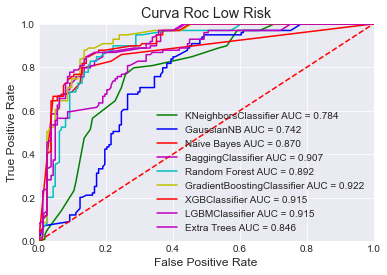

In [278]:
# Calcularemos la curva ROC y el área bajo la curva para el clasificador KNeighborsClassifier
probs1 = model_1.predict_proba(X_test)
fpr1, tpr1, threshold =roc_curve(y_test, probs1[:,0], pos_label=0)
roc_auc1 = metrics.auc(fpr1, tpr1)

# Calcularemos la curva ROC y el área bajo la curva para el clasificador GaussianNB
probs2 = model_2.predict_proba(X_test)
fpr2, tpr2, threshold =roc_curve(y_test, probs2[:,0], pos_label=0)
roc_auc2 = metrics.auc(fpr2, tpr2)


# Calcularemos la curva ROC y el área bajo la curva para el clasificador Naive Bayes
probs3 = model_3.predict_proba(X_test)
fpr3, tpr3, threshold =roc_curve(y_test, probs3[:,0], pos_label=0)
roc_auc3 = metrics.auc(fpr3, tpr3)


# Calcularemos la curva ROC y el área bajo la curva para el clasificador BaggingClassifier
probs4 = bag_clf.predict_proba(X_test)
fpr4, tpr4, threshold =roc_curve(y_test, probs4[:,0], pos_label=0)
roc_auc4 = metrics.auc(fpr4, tpr4) 


# Calcularemos la curva ROC y el área bajo la curva para el clasificador Random Forest
probs5 = random_forest.predict_proba(X_test)
fpr5, tpr5, threshold =roc_curve(y_test, probs5[:,0], pos_label=0)
roc_auc5 = metrics.auc(fpr5, tpr5)


# Calcularemos la curva ROC y el área bajo la curva para el clasificador GradientBoostingClassifier
probs6 = grad_boost.predict_proba(X_test)
fpr6, tpr6, threshold =roc_curve(y_test, probs6[:,0], pos_label=0)
roc_auc6 = metrics.auc(fpr6, tpr6)

# Calcularemos la curva ROC y el área bajo la curva para el clasificador XGBClassifier
probs7 = xgb_grid.predict_proba(X_test)
fpr7, tpr7, threshold =roc_curve(y_test, probs7[:,0], pos_label=0)
roc_auc7 = metrics.auc(fpr7, tpr7)

# Calcularemos la curva ROC y el área bajo la curva para el clasificador LGBMClassifier
probs8 = grid_lgb.predict_proba(X_test)
fpr8, tpr8, threshold =roc_curve(y_test, probs8[:,0], pos_label=0)
roc_auc8 = metrics.auc(fpr8, tpr8)

# Calcularemos la curva ROC y el área bajo la curva para el clasificador Extra Trees
probs9 = extra_tree.predict_proba(X_test)
fpr9, tpr9, threshold =roc_curve(y_test, probs9[:,0], pos_label=0)
roc_auc9 = metrics.auc(fpr9, tpr9)

plt.title('Curva Roc Low Risk')
plt.plot(fpr1, tpr1, 'g', label = 'KNeighborsClassifier AUC = %0.3f' % roc_auc1)
plt.plot(fpr2, tpr2, 'b', label = 'GaussianNB AUC = %0.3f' % roc_auc2)
plt.plot(fpr3, tpr3, 'r', label = 'Naive Bayes AUC = %0.3f' % roc_auc3)
plt.plot(fpr4, tpr4, 'm', label = 'BaggingClassifier AUC = %0.3f' % roc_auc4)
plt.plot(fpr5, tpr5, 'c', label = 'Random Forest AUC = %0.3f' % roc_auc5)
plt.plot(fpr6, tpr6, 'y', label = 'GradientBoostingClassifier AUC = %0.3f' % roc_auc6)
plt.plot(fpr7, tpr7, 'r', label = 'XGBClassifier AUC = %0.3f' % roc_auc7)
plt.plot(fpr8, tpr8, 'm', label = 'LGBMClassifier AUC = %0.3f' % roc_auc8)
plt.plot(fpr9, tpr9, 'm', label = 'Extra Trees AUC = %0.3f' % roc_auc9)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Pickles

Aplicando la librería Pickles, lo que hicimos fue serializar un objeto Python en un formato binario. En este caso, el trabajo fue hecho con la predicción de nuestro mejor modelo (XG Boost). Probamos levantar nuestro mejor modelo y lo renombramos. 
Luego observamos si los archivos se crearon en la carpeta en donde estamos ejecutando la notebook y a continuación le pedimos una predicción (simulamos lo que sería un "caso real" aplicando el X_test de nuestro dataset original). La predicción la realizamos con el dataset escaleado y sin escalear (ambos ya con la limpieza hecha).


In [280]:
import pickle

In [281]:
with open('xgb_grid.pkl', 'wb') as f_gb:
    pickle.dump(xgb_grid, f_gb)

In [282]:
import os
#Comprobamos que los archivos se crearon en la carpeta en donde estamos ejecutando la notebook

[x for x in os.listdir() if 'pkl' in x]

['xgb_grid.pkl']

In [283]:
# Probamos levantar nuestro mejor modelo y lo llamamos con otro nombre:

with open('./xgb_grid.pkl', 'rb') as f_math:
        modelo_xgb = pickle.load(f_math)

In [284]:
# Pedimos una prediccion [Simulamos lo que sería un "caso real"]

modelo_xgb.predict(X_test)

array([1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1,
       2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 0, 0, 1, 1, 2,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 2, 0, 1,
       2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0,
       2, 0, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1, 2, 0,
       0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2,
       0, 1, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2,
       0, 0, 2, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2],
      dtype=int64)

In [285]:
X_test.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,-1.146675,-0.856559,-0.605125,-0.579325,-0.537385,0.640223
1,-0.483100,0.275783,0.945558,-0.394219,-0.537385,-0.642082
2,-1.051879,-1.422730,-1.380466,-0.579325,1.493090,0.127301
3,-1.146675,-1.422730,-0.992795,-0.579325,-0.537385,0.127301
4,-0.862286,0.275783,0.170216,-0.548474,-0.537385,-0.642082


### Conclusiones

* Se eligió el método de balanceo de clases SMOTENC ya que es el que nos daba un valor de "Recall" más alto para la clase high risk.

* El mejor modelo de predicción para nuestro caso de uso en base a las metricas Accuaracy, Precision, Recall y F1 score fue XGBoost, por eso se decidió generar un pickle para este modelo.

* Nuestro dataset cuenta con una cantidad reducida de features, por esta razón se eligió no descartar ninguna.